In [2]:
# Import necessary libraries
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit learn libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [9]:
# Define a dictionary with the connection details
db_config = {
    'username': 'postgres',
    'password': 'pass123',
    'host': 'localhost',
    'port': '5432',
    'database': 'telecom'
}

# Create a connection to the PostgreSQL database
engine = create_engine(f"postgresql://{db_config['username']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}")

# Execute a SQL query and load the result into a DataFrame
query = text("SELECT * FROM xdr_data")
with engine.connect() as conn: 
    df = pd.read_sql_query(query, conn)

In [10]:
# Print the shape of the DataFrame
df.shape

(150001, 55)

In [11]:

# Check the DataFrame's information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [12]:

# Describe the DataFrame
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [13]:

# Check for missing values
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [14]:

# Check for duplicates
df.duplicated().sum()

0

In [15]:

# Identify the top 10 handsets used by the customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


In [16]:

# Identify the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


In [17]:

# Identify the top 5 handsets per top 3 handset manufacturer
top_5_handsets_per_manufacturer = \
df[df['Handset Manufacturer'].isin(top_3_manufacturers.index)].groupby('Handset Manufacturer')[
    'Handset Type'].value_counts().groupby(level=0).head(5)
print(top_5_handsets_per_manufacturer)

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: Handset Typ

# **Task 2.2**

# Exploratory Data Analysis


### Describe the relevant variables and data types

In [18]:
# Check the data types of the columns
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

### Analyze the basic metrics

In [19]:
# Check the basic metrics of the numerical columns
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [20]:
# Get the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [21]:
# Create an empty DataFrame to store the results
dispersion_df = pd.DataFrame()

# For each numerical column, calculate the dispersion parameters and add them to the DataFrame
for col in numerical_columns:
    dispersion_df[col] = pd.Series({
        'Count': df[col].count(),
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Mode': df[col].mode().values[0],
        'Standard Deviation': df[col].std(),
        'Variance': df[col].var(),
        'Range': df[col].max() - df[col].min(),
        'Min': df[col].min(),
        'Max': df[col].max(),
        '1st Quartile': df[col].quantile(0.25),
        '3rd Quartile': df[col].quantile(0.75),
        'IQR': df[col].quantile(0.75) - df[col].quantile(0.25)
    })

# Print the resulting DataFrame
dispersion_df

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,1.500000e+05,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
Mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,1.330005e+04,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
Median,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,6.300000e+01,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
Mode,1.304243e+19,341.000000,872.000000,8.639900e+04,2.082014e+14,3.362632e+10,3.518231e+13,28.000000,5.000000,2.300000e+01,...,1.886917e+07,3.398443e+06,2.097111e+06,1.751610e+06,8.873172e+07,1.530467e+07,2.861627e+07,4.514572e+06,1.936246e+07,7.412612e+07
Standard Deviation,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,2.397188e+04,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
Variance,8.370447e+36,83296.790866,83000.257780,6.567096e+09,4.617380e+20,5.989979e+24,5.024937e+26,384130.644179,7189.941725,5.746510e+08,...,4.503173e+13,4.026440e+13,4.522856e+13,4.044311e+13,5.952014e+16,2.287422e+13,5.914868e+16,2.274340e+13,1.271569e+14,5.960574e+16
Range,6.269004e+18,999.000000,999.000000,1.852194e+06,1.002719e+13,8.823635e+14,9.856119e+13,96923.000000,7120.000000,3.781600e+05,...,2.325904e+07,2.201186e+07,2.325915e+07,2.201192e+07,8.434394e+08,1.655874e+07,8.434392e+08,1.655867e+07,7.546442e+07,8.958556e+08
Min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000e+00,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
Max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,3.781600e+05,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08
1st Quartile,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,4.300000e+01,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08


#  Graphical Univariate Analysis 

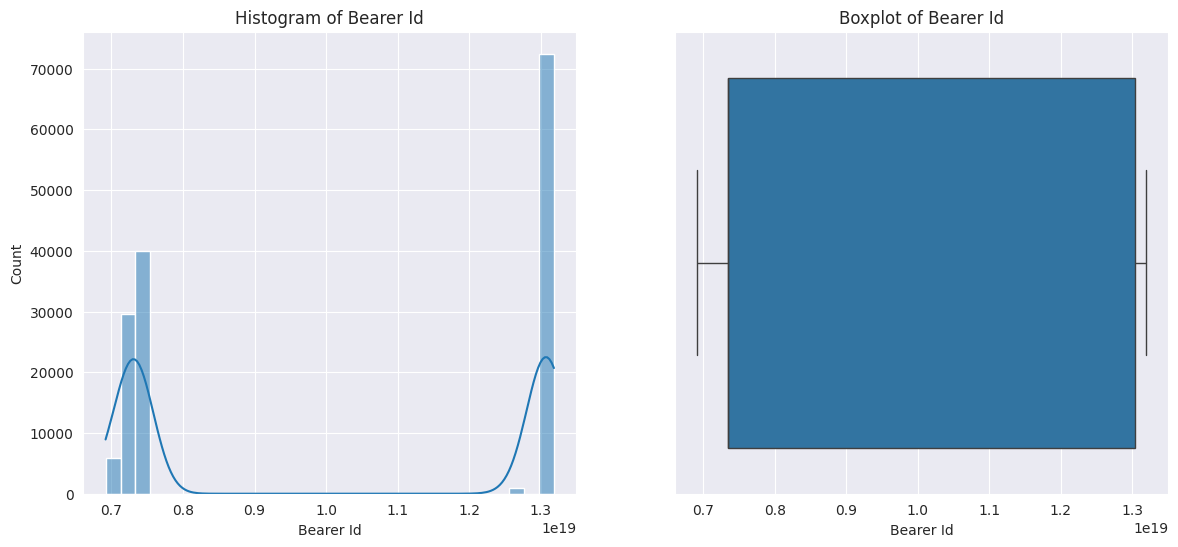

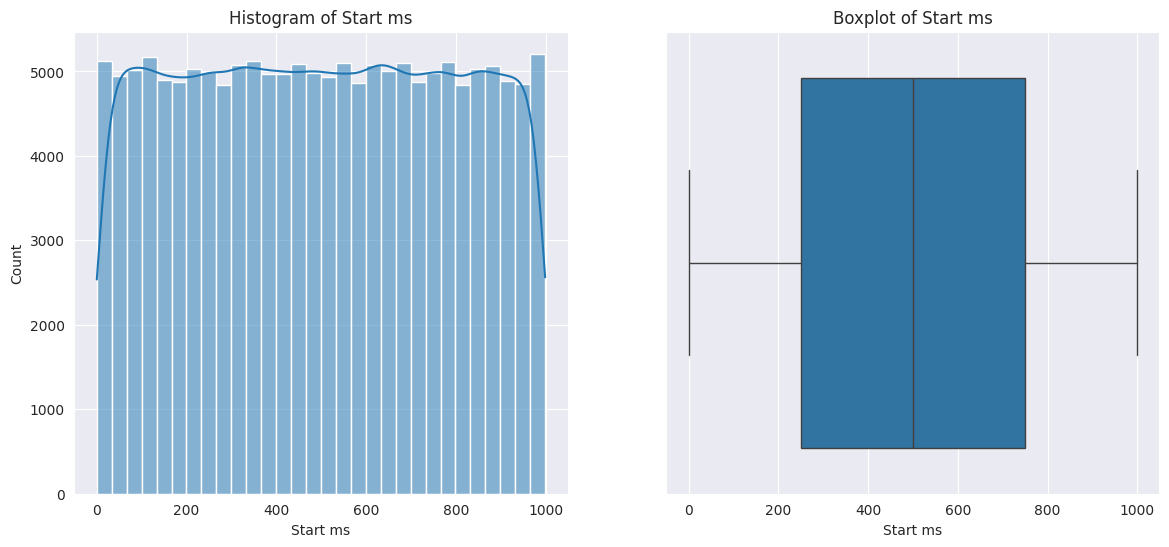

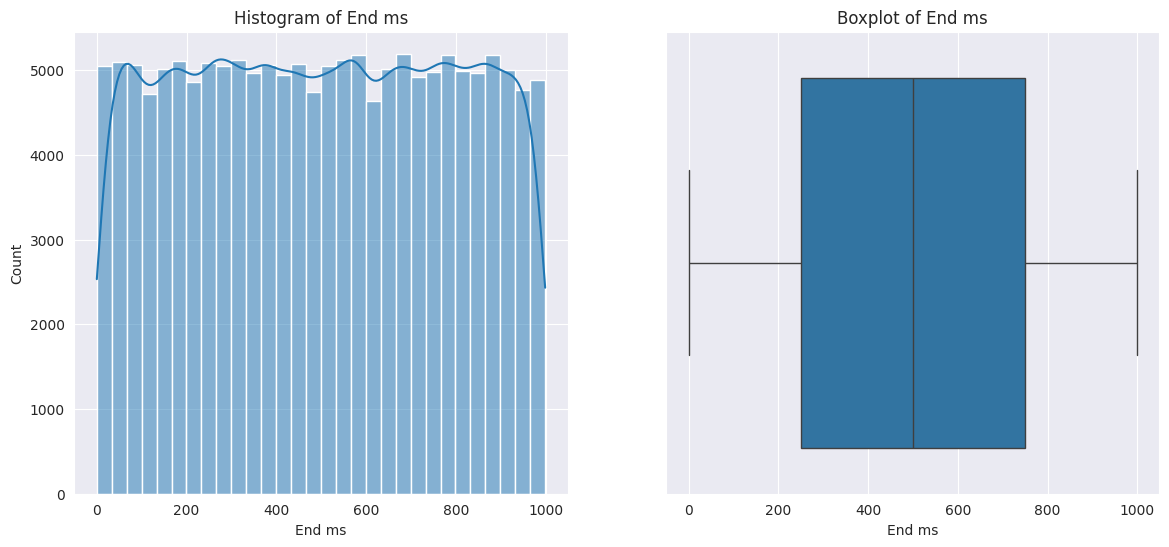

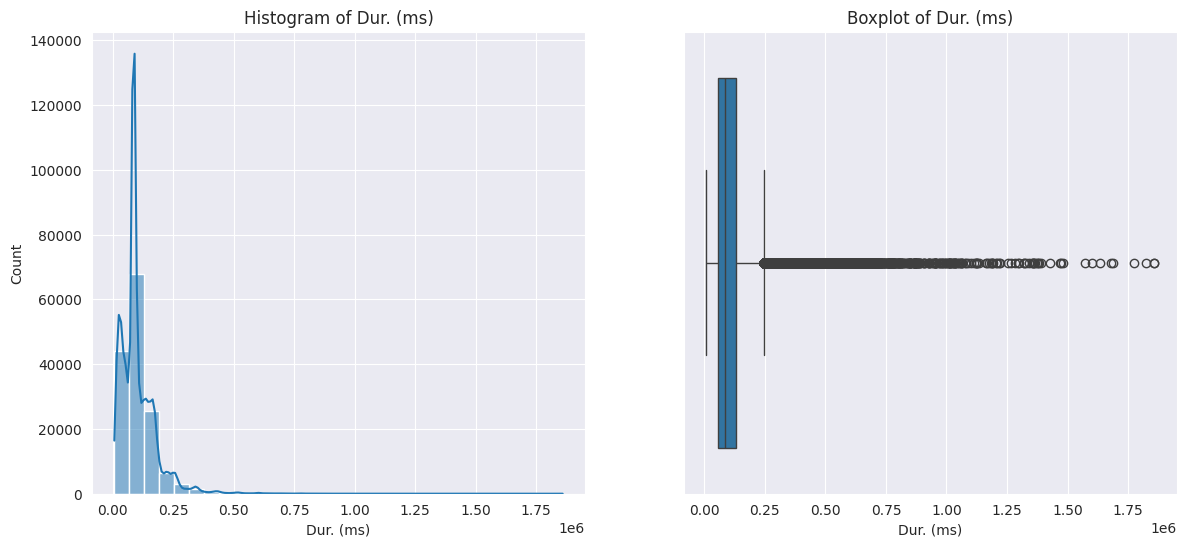

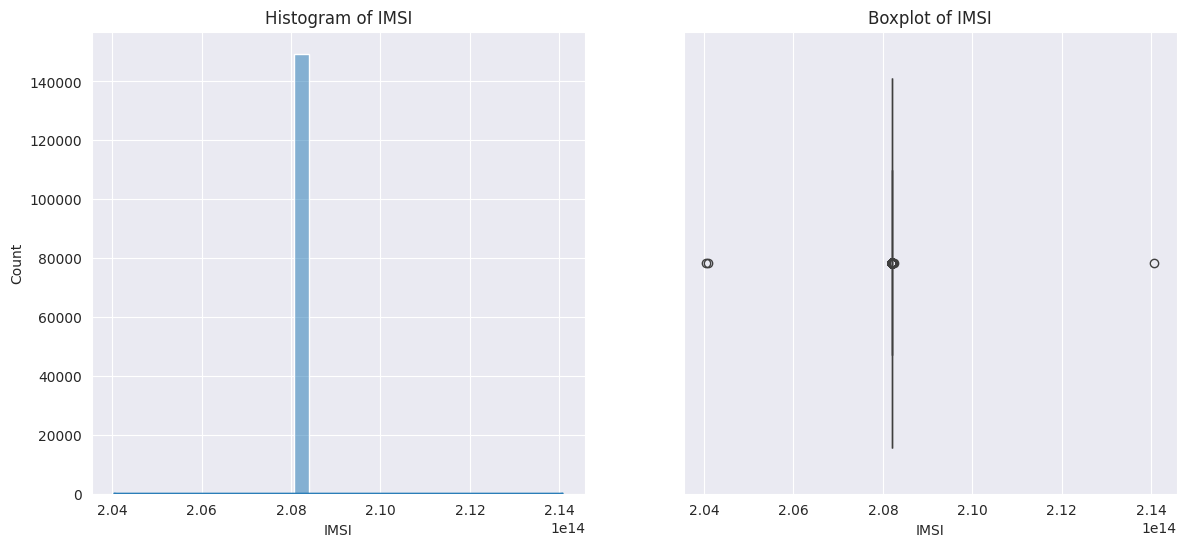

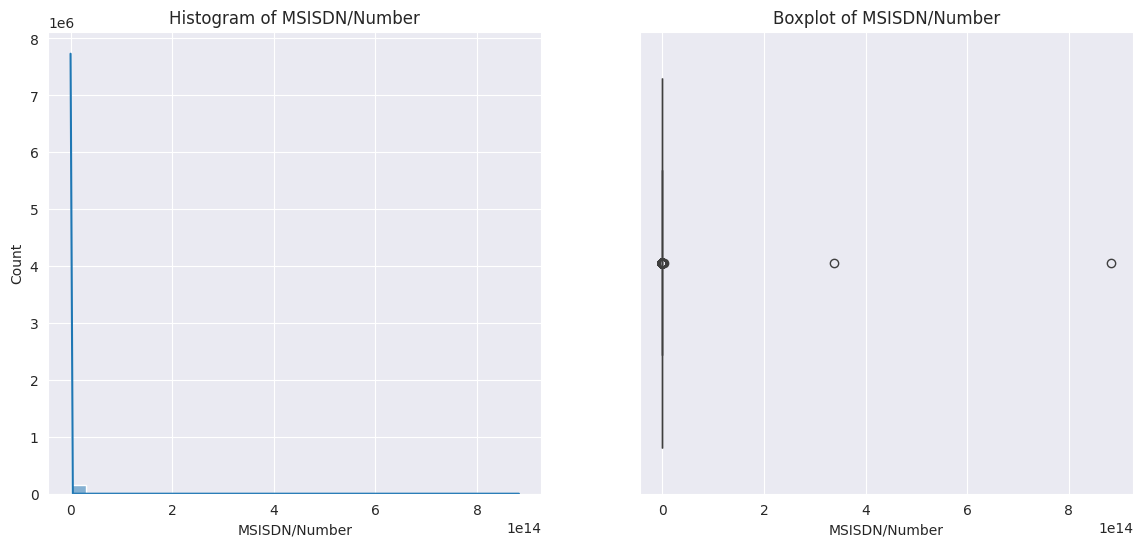

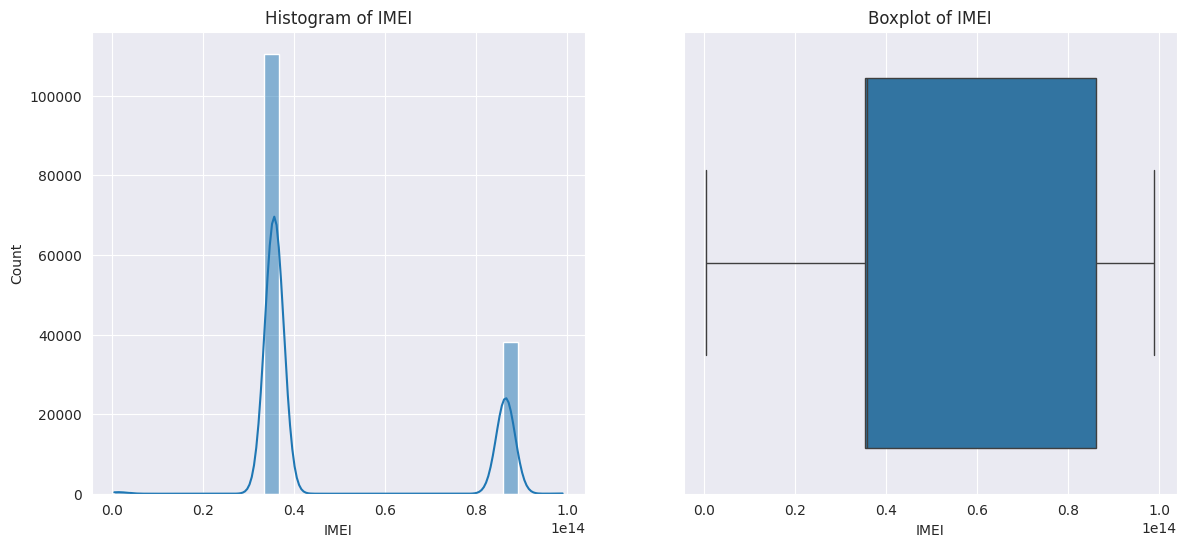

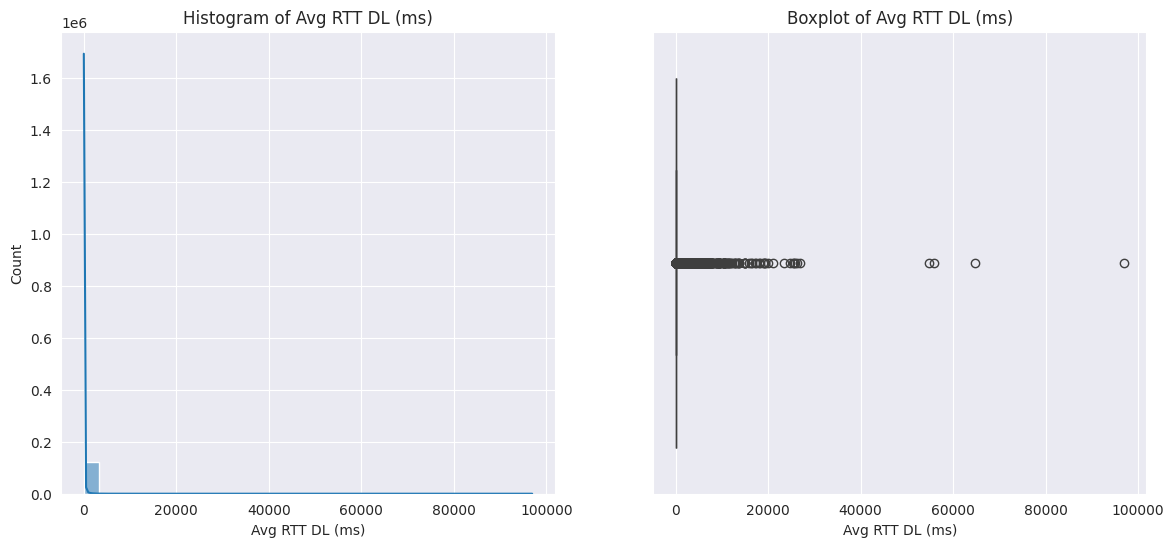

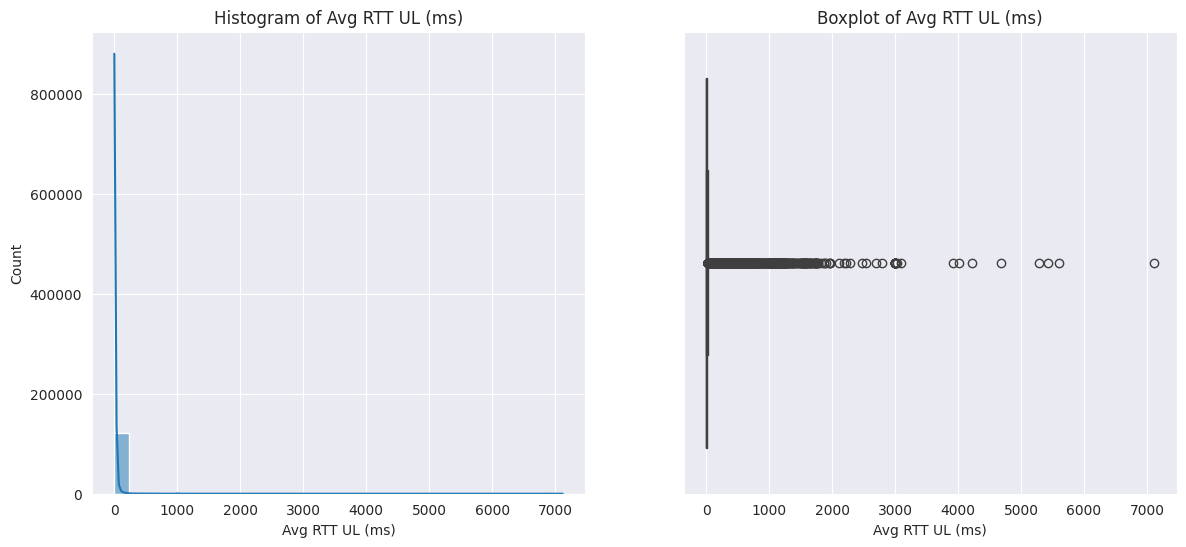

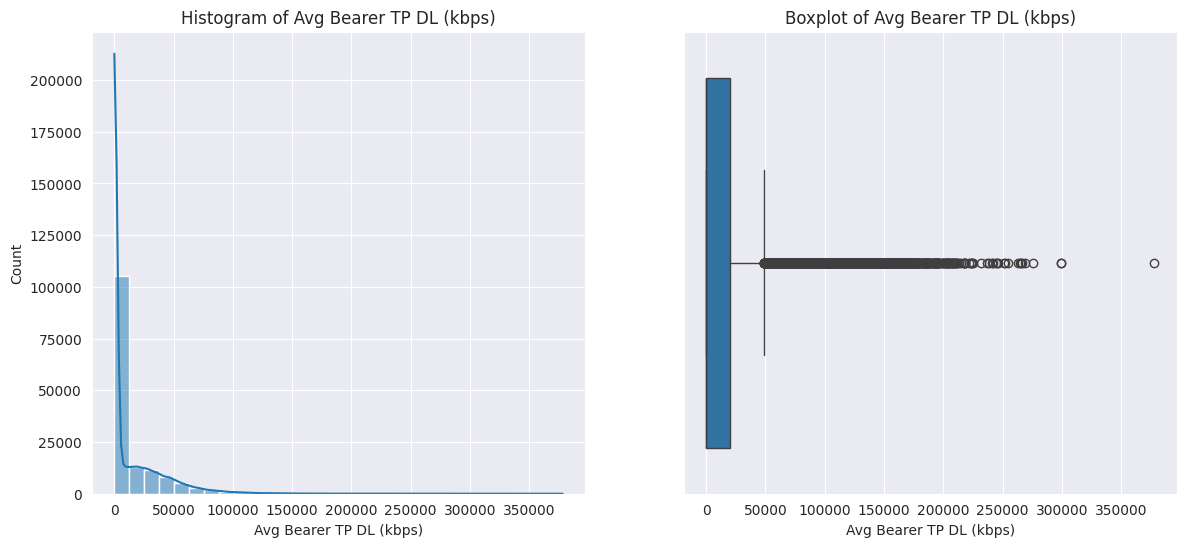

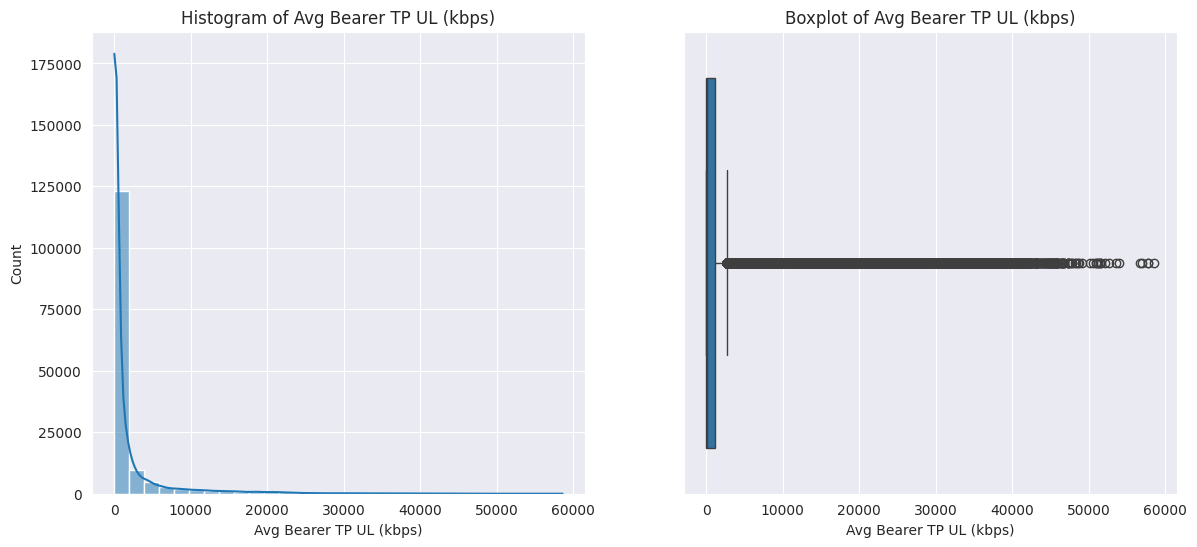

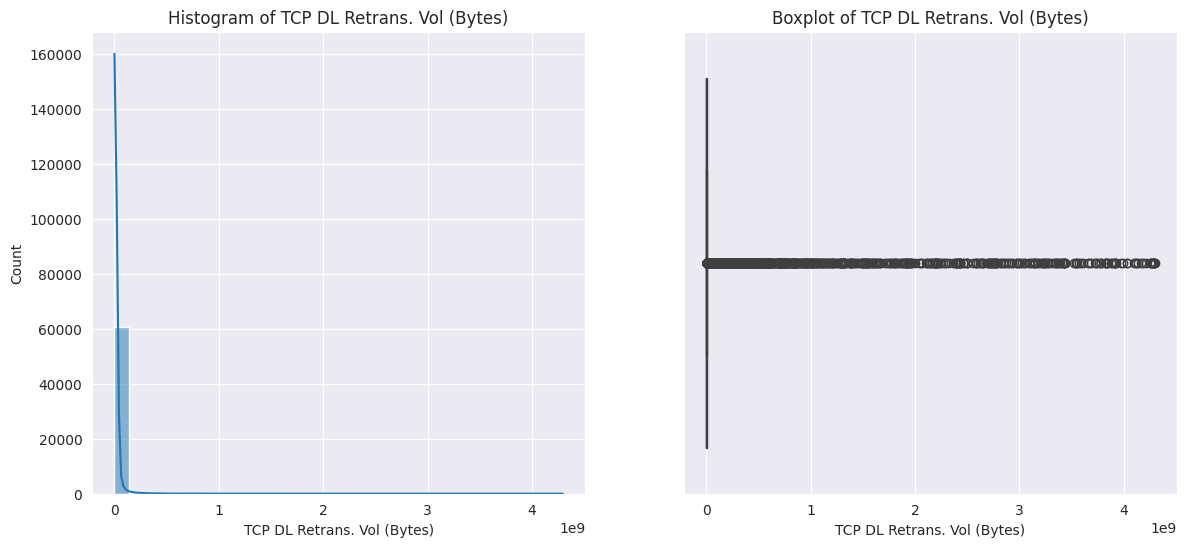

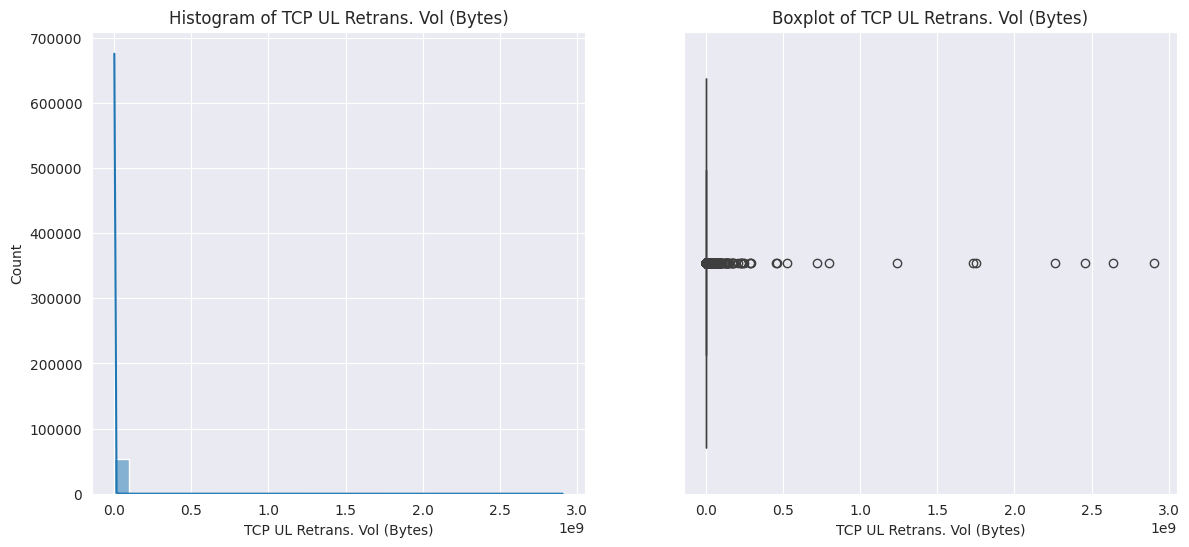

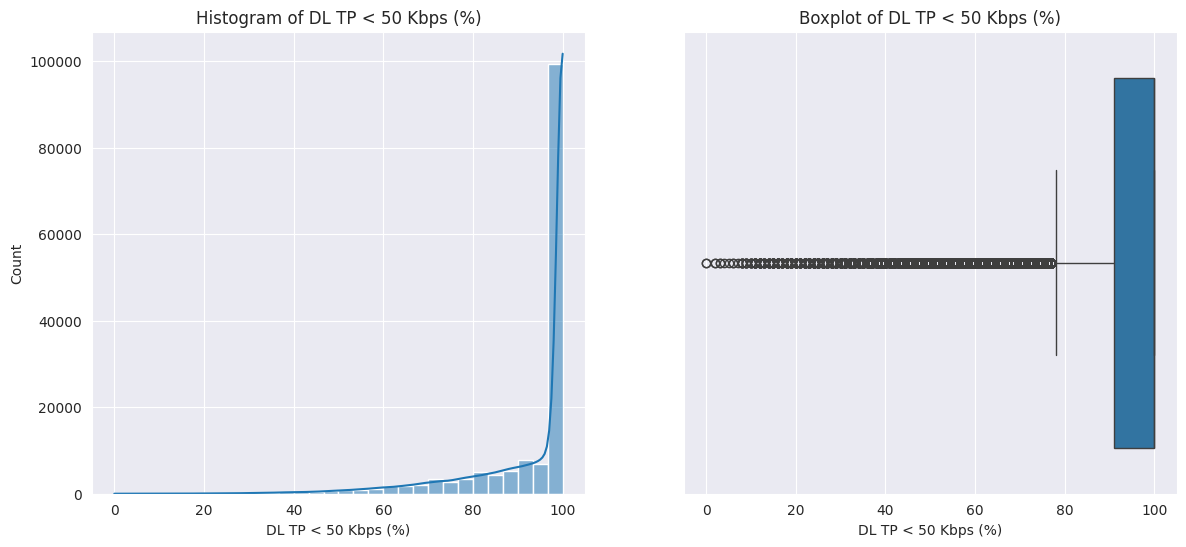

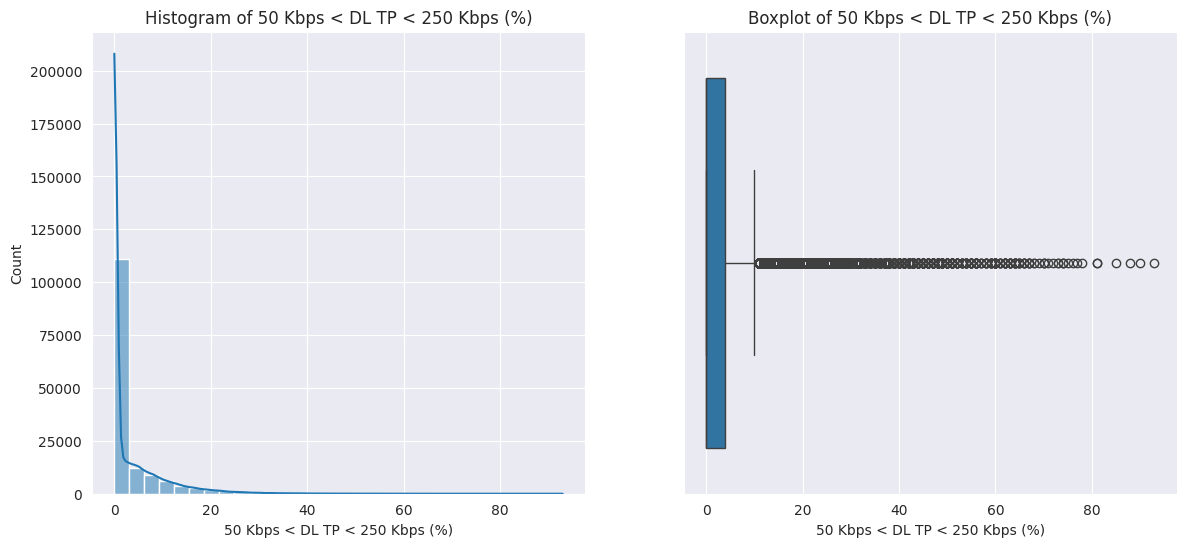

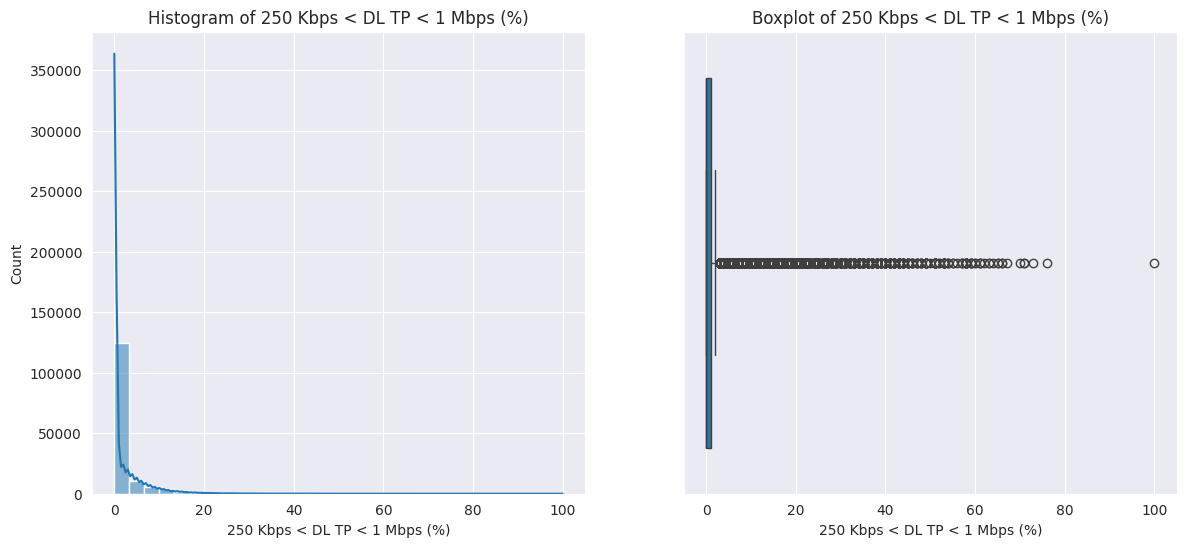

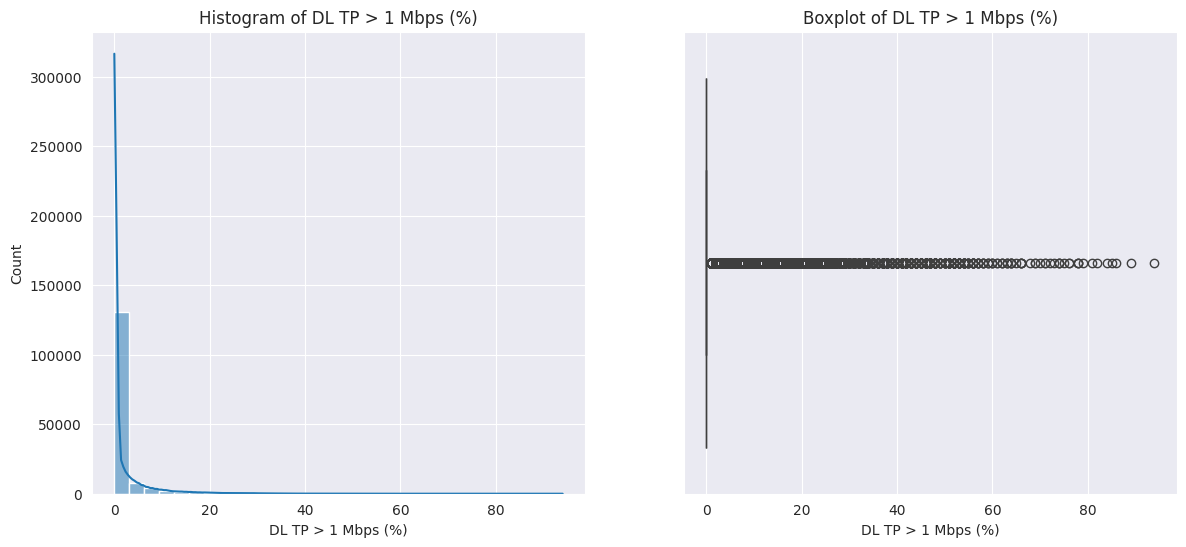

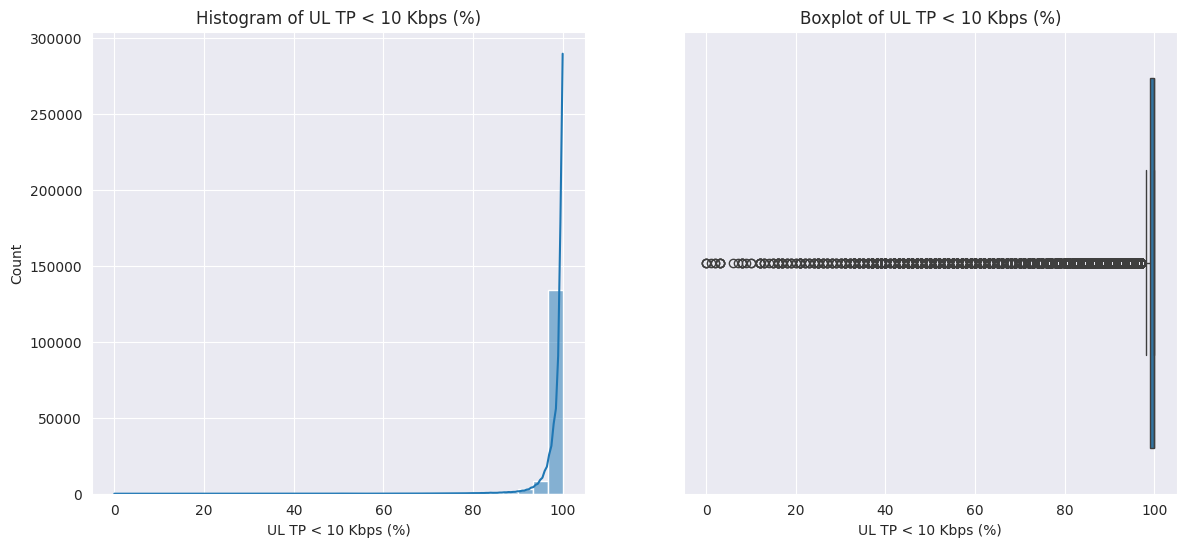

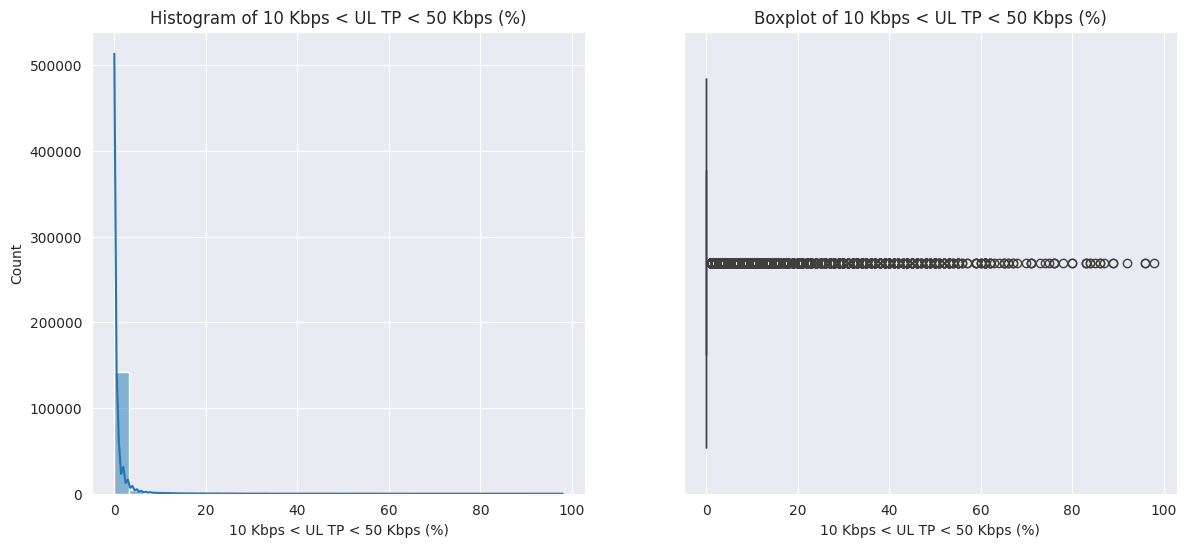

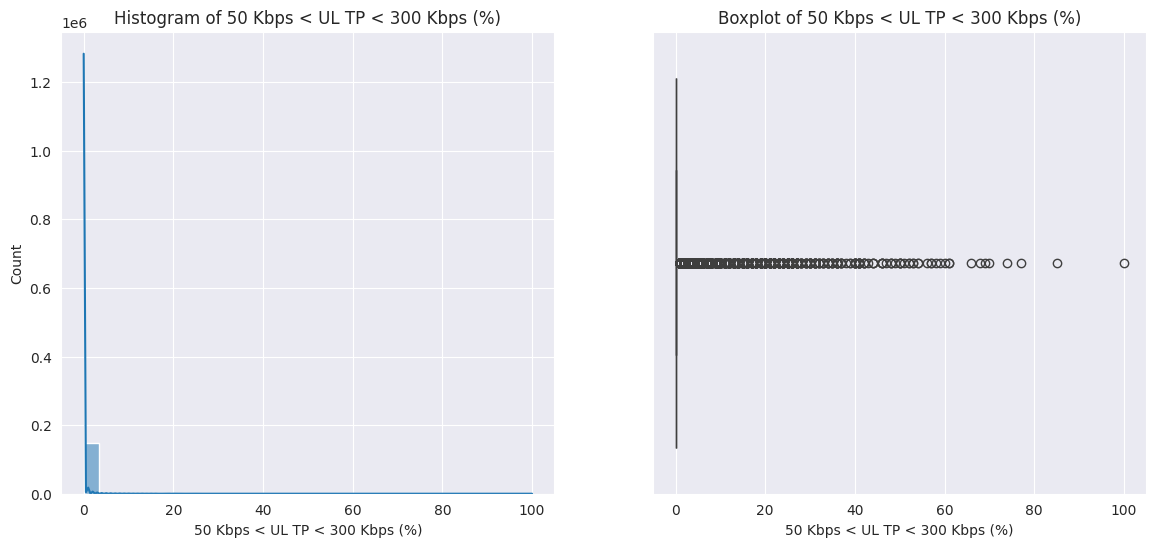

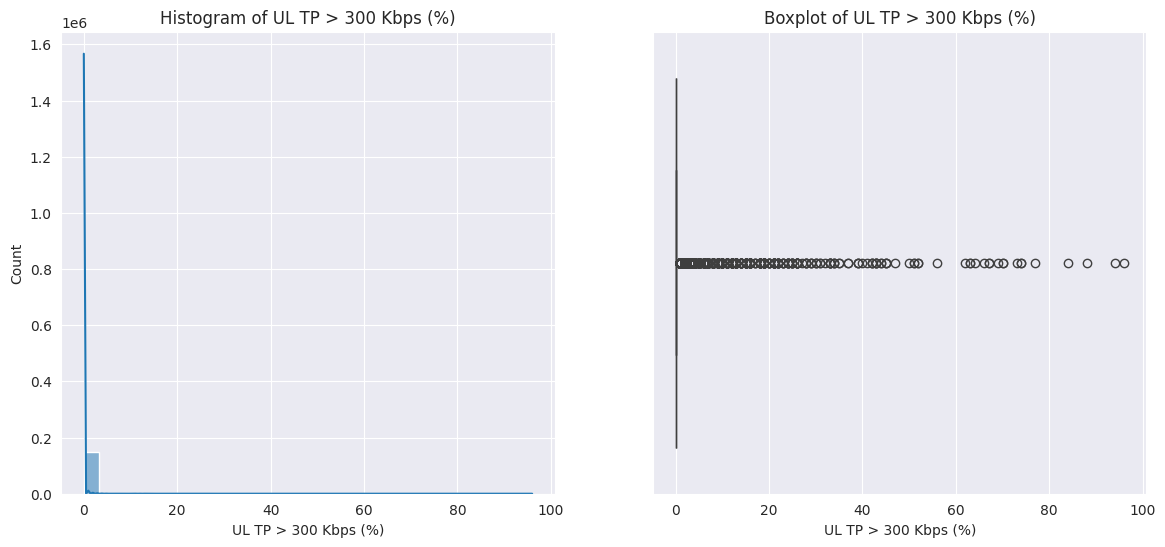

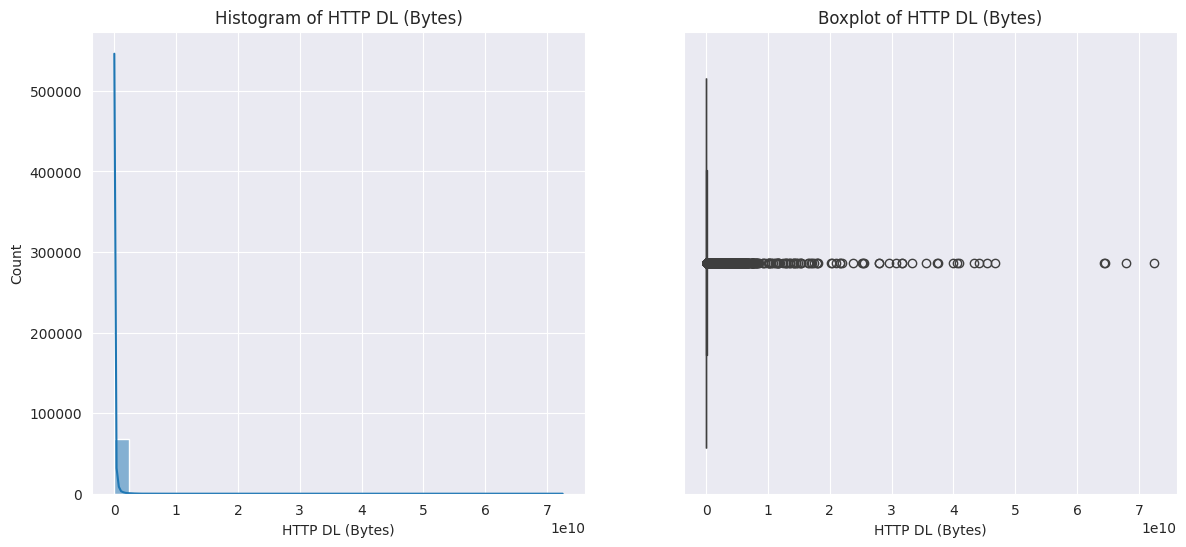

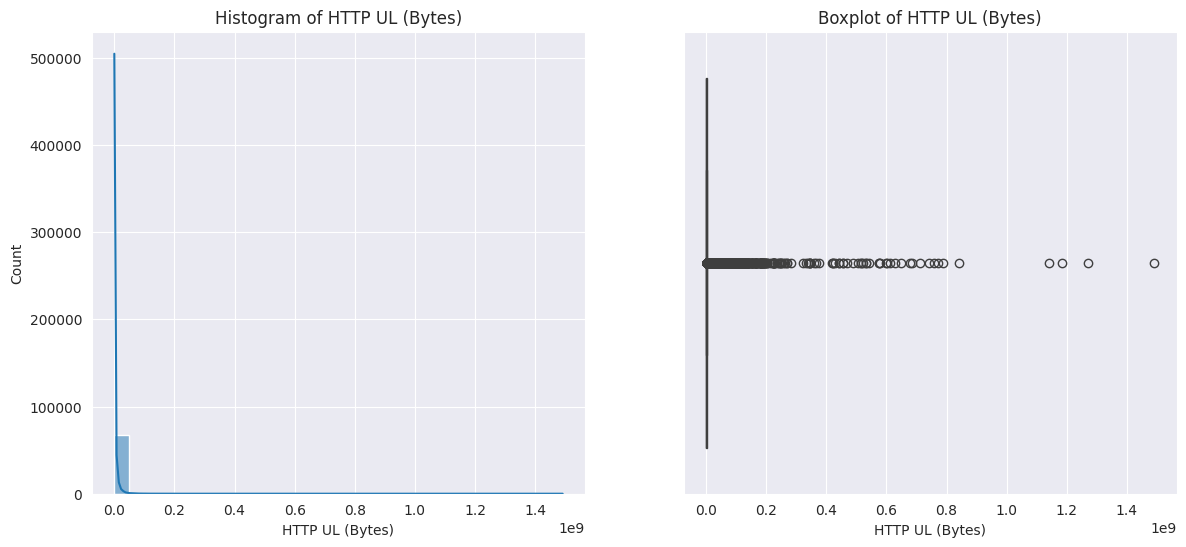

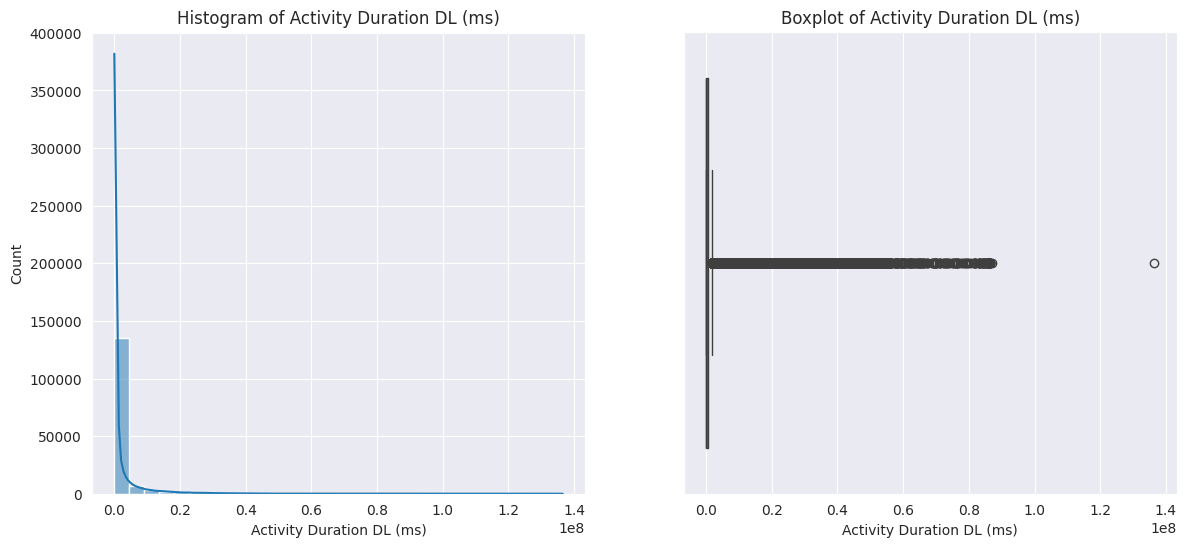

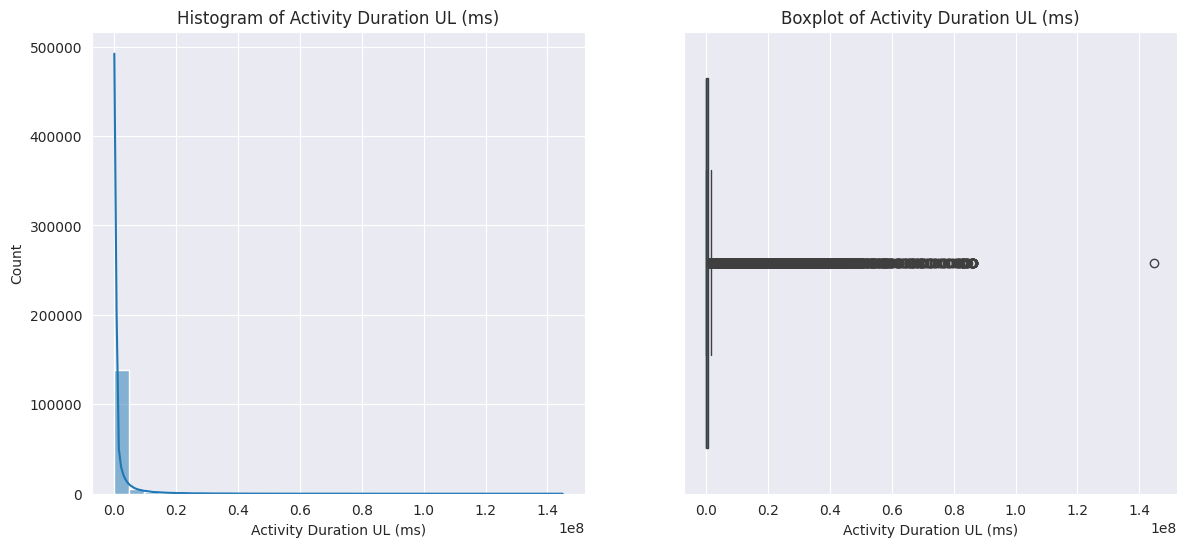

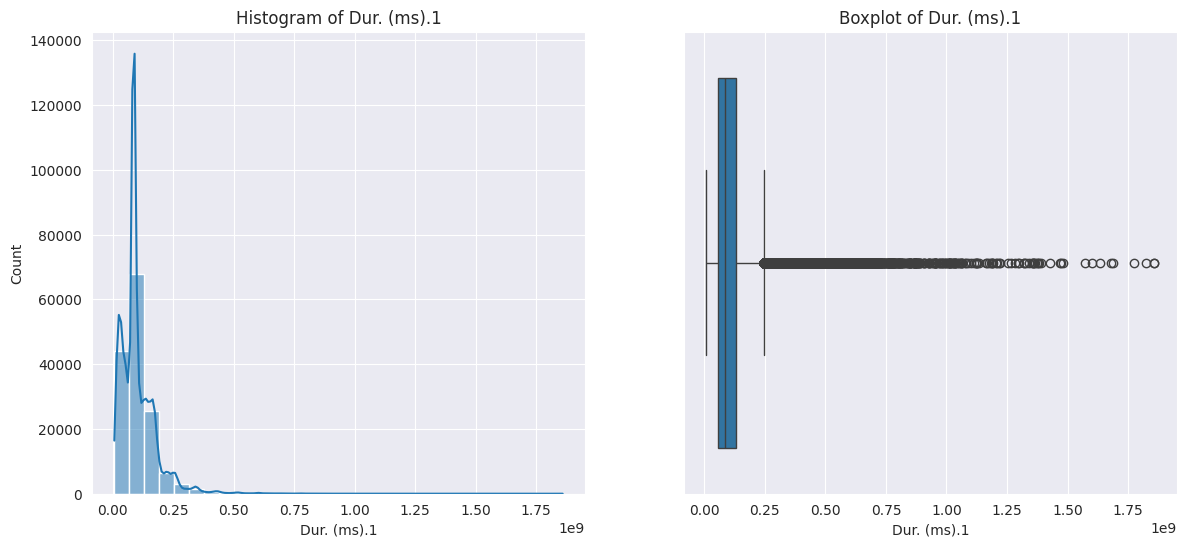

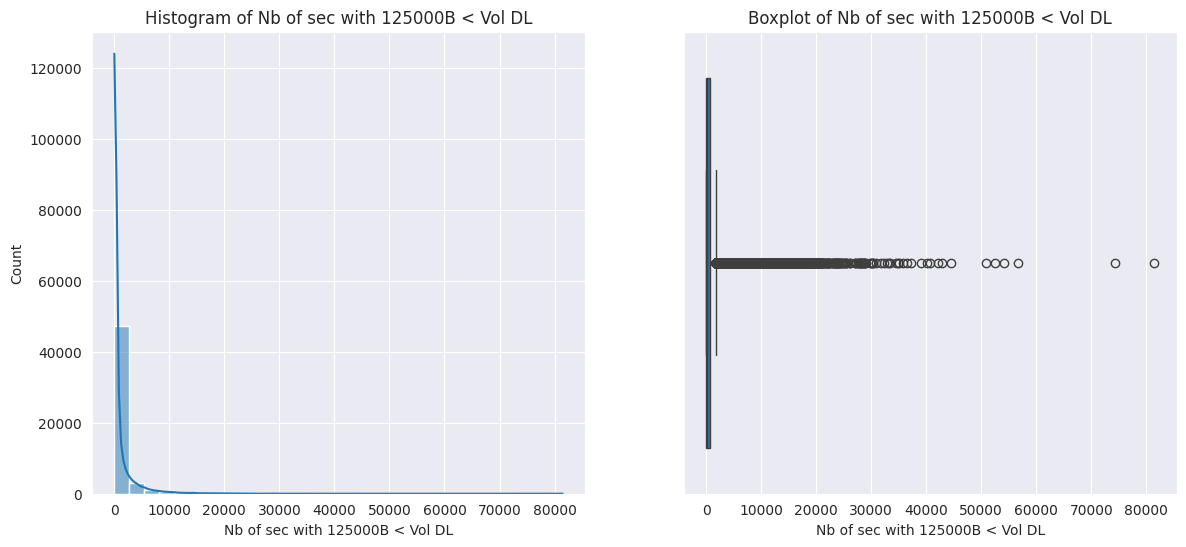

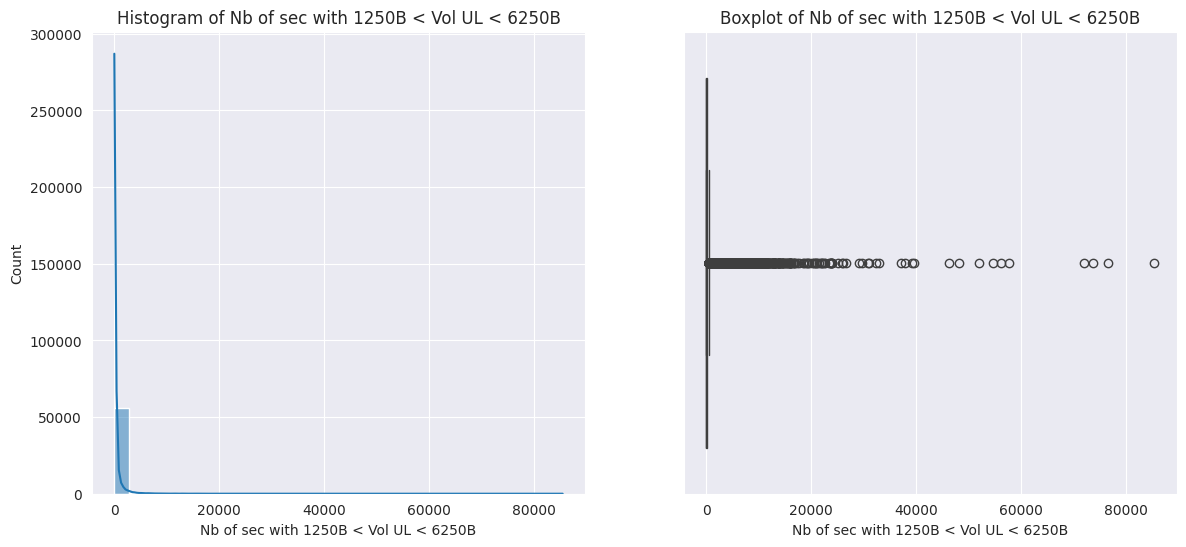

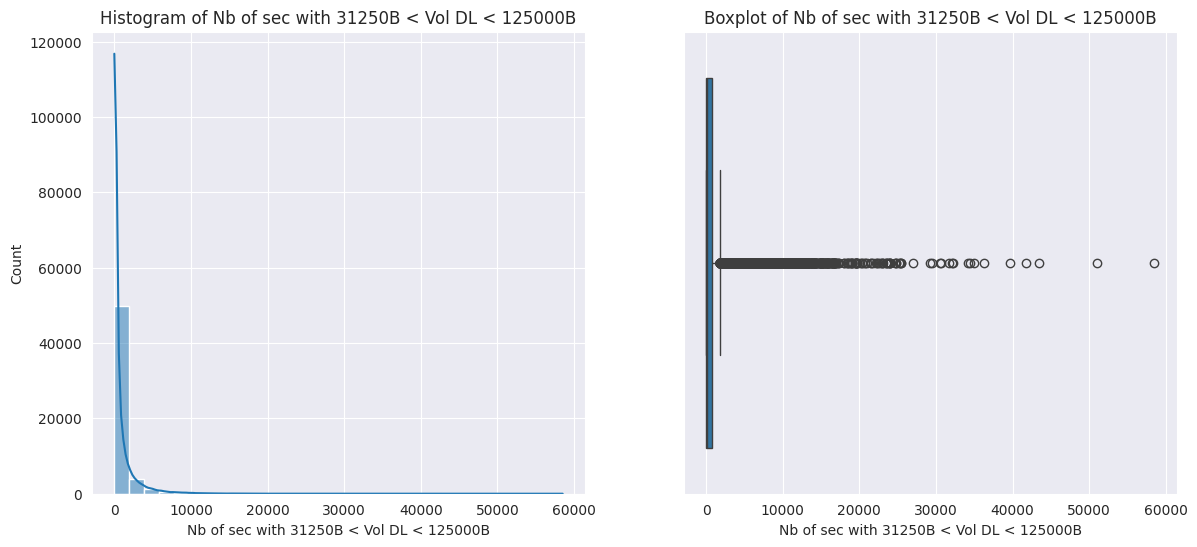

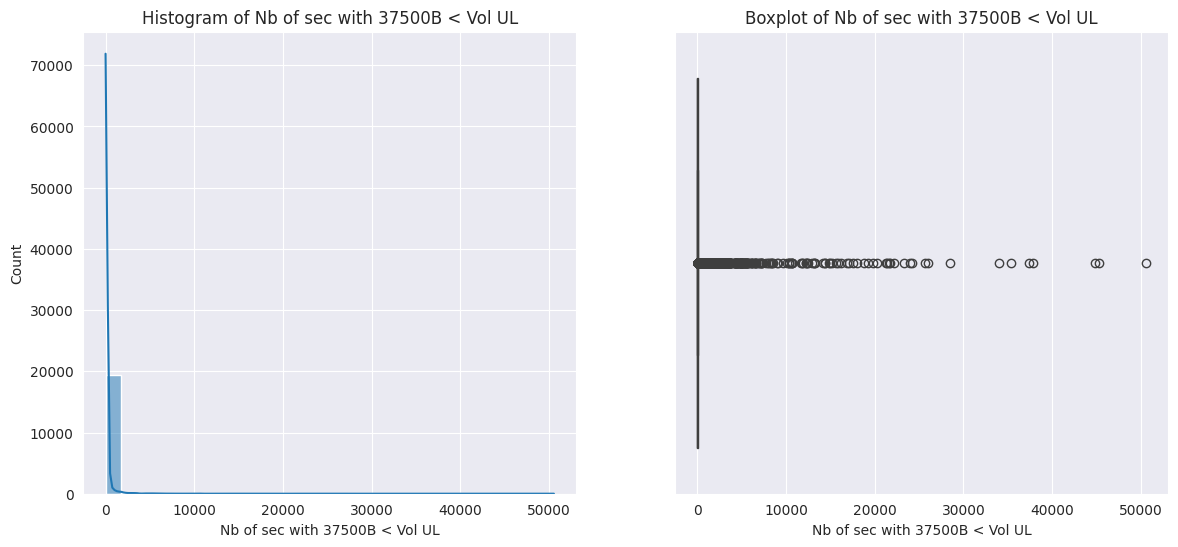

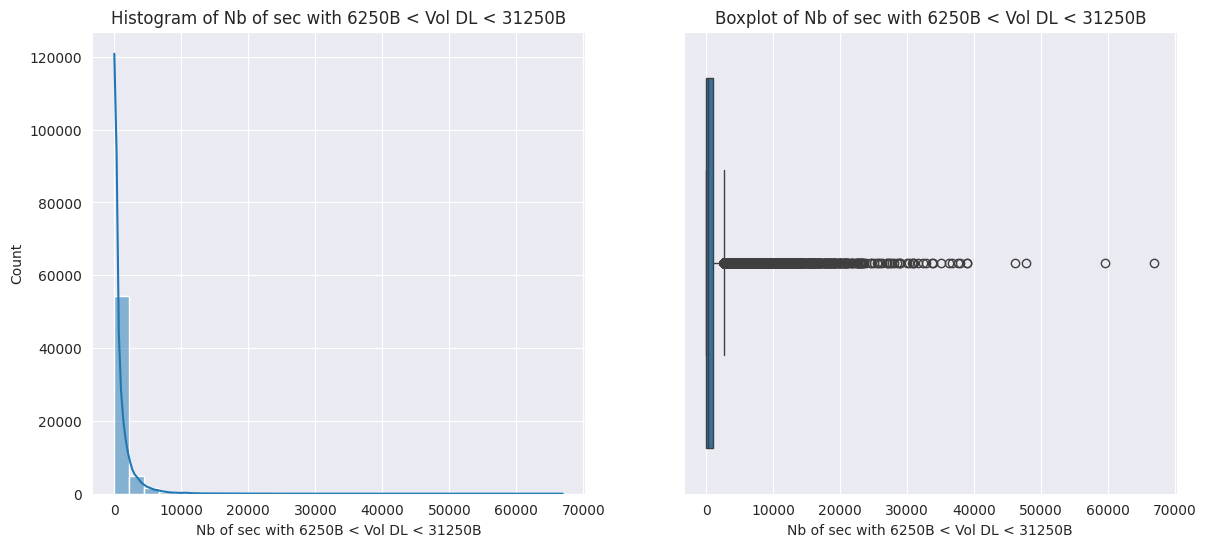

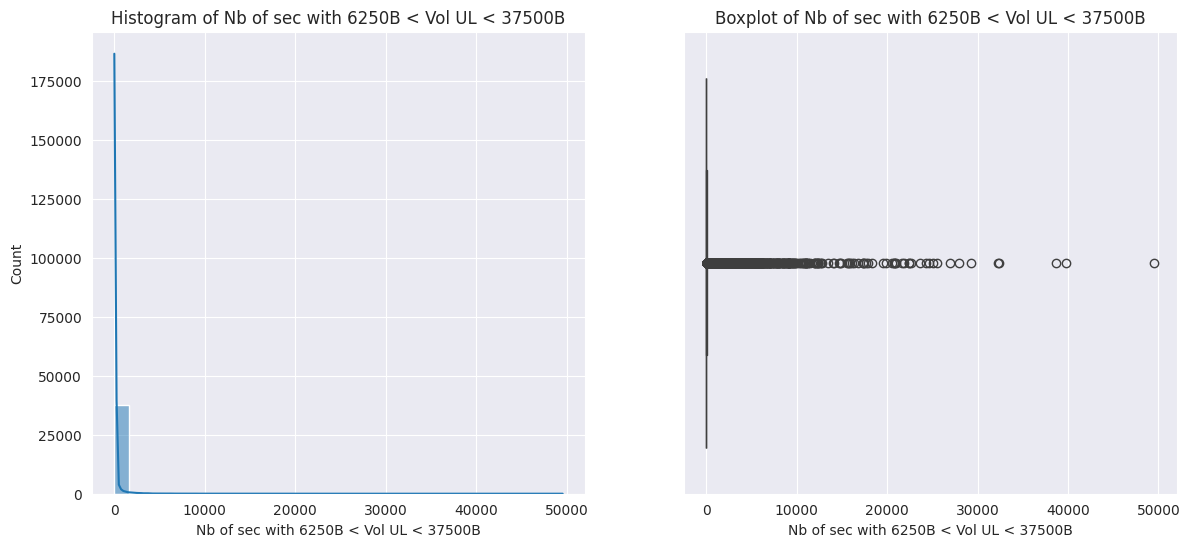

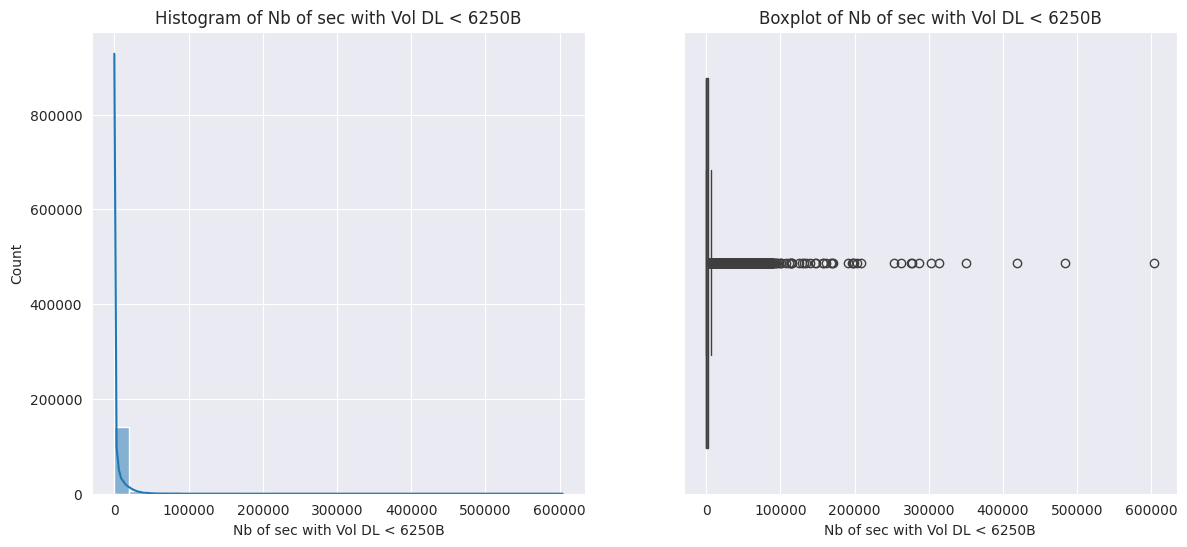

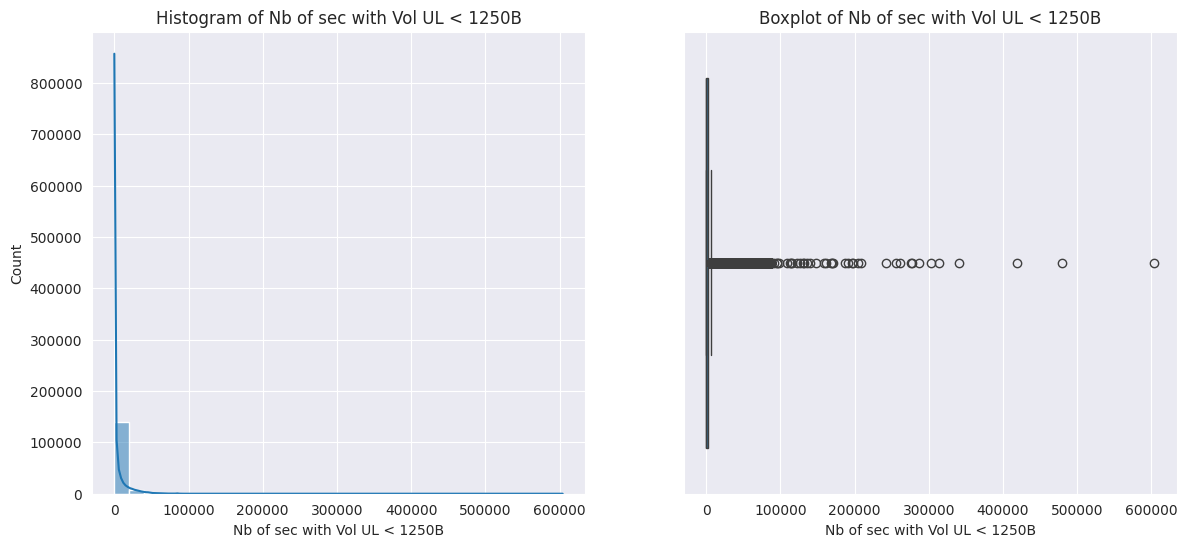

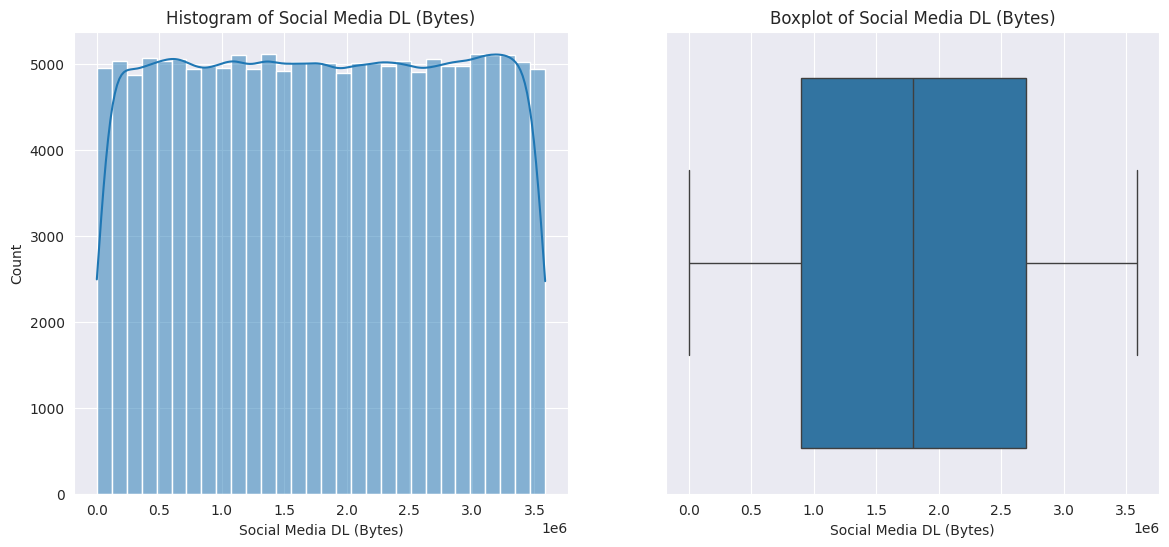

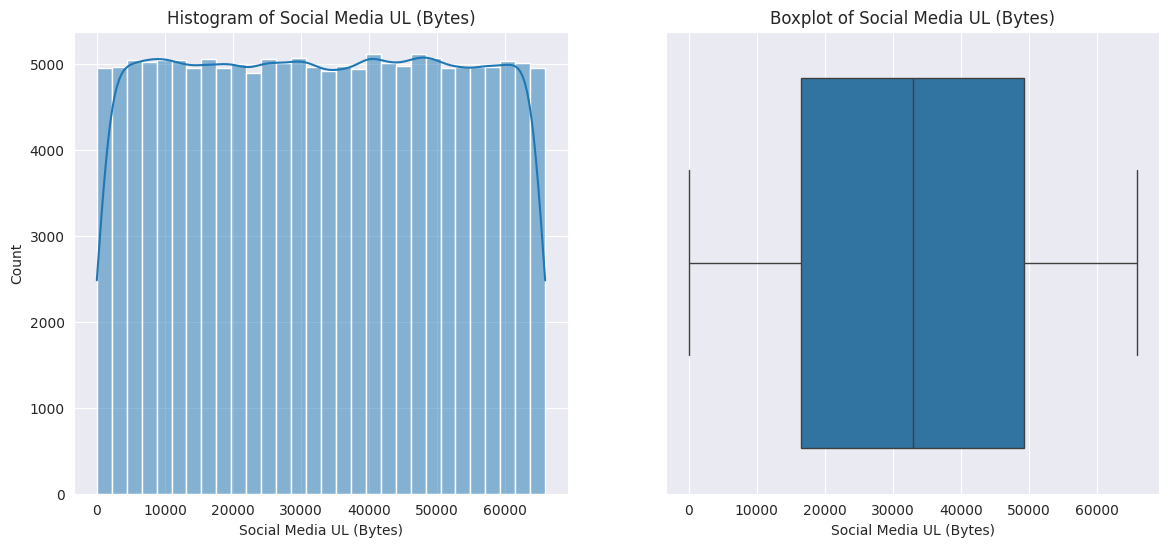

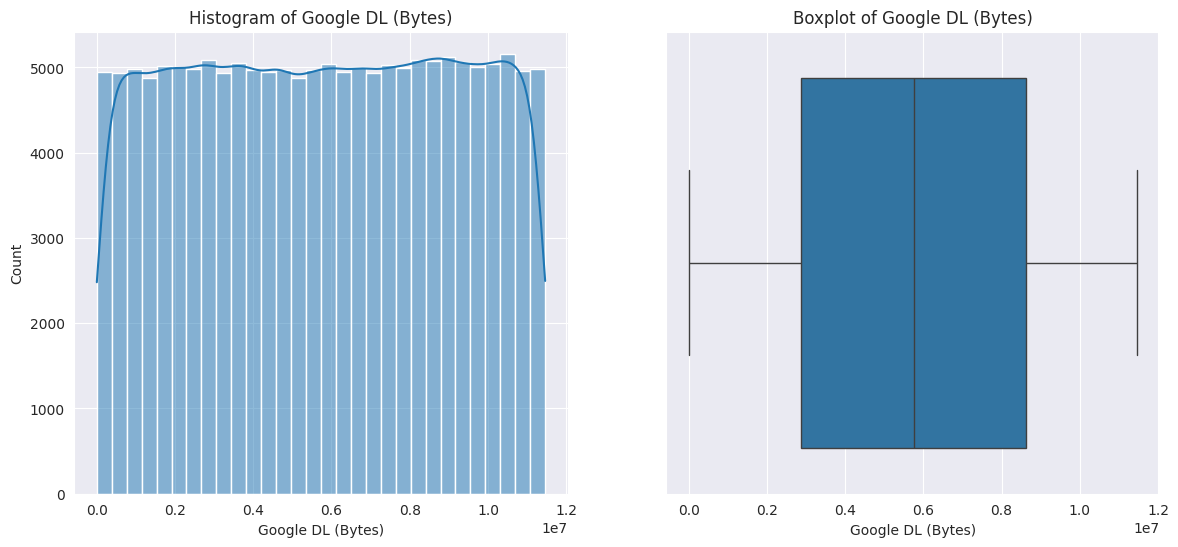

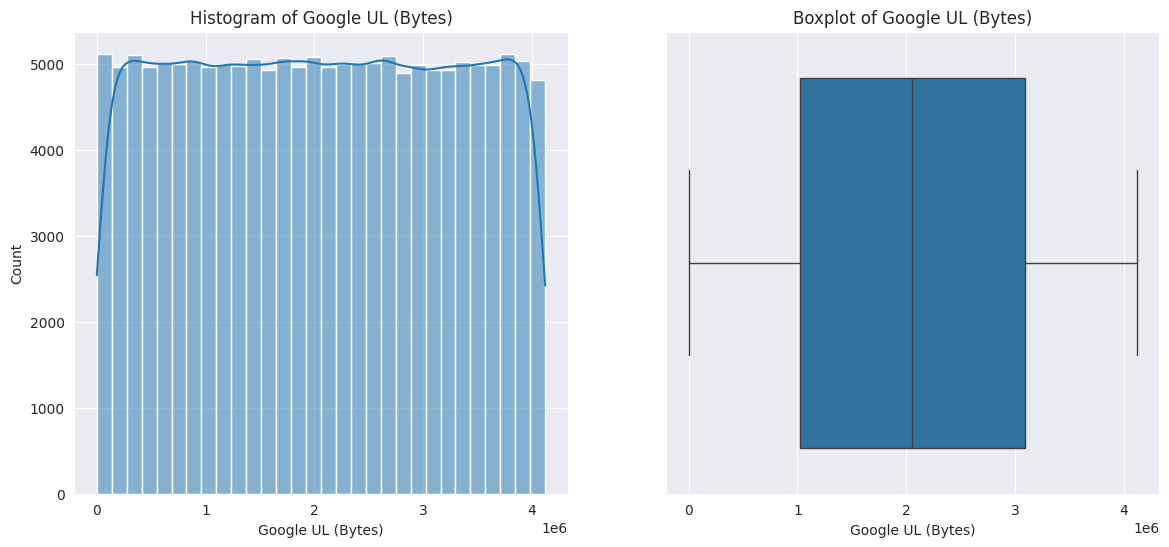

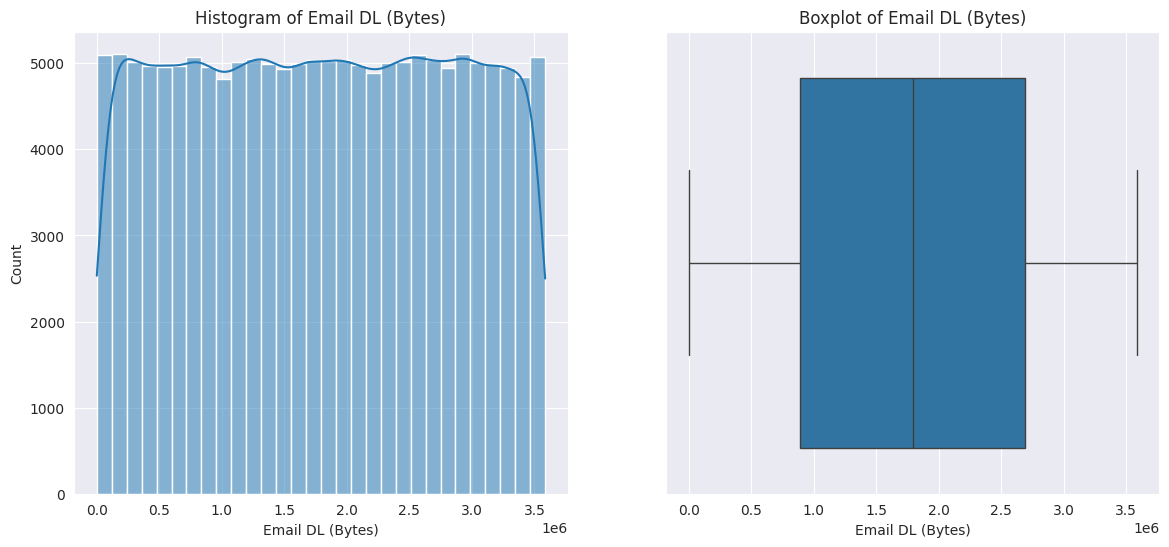

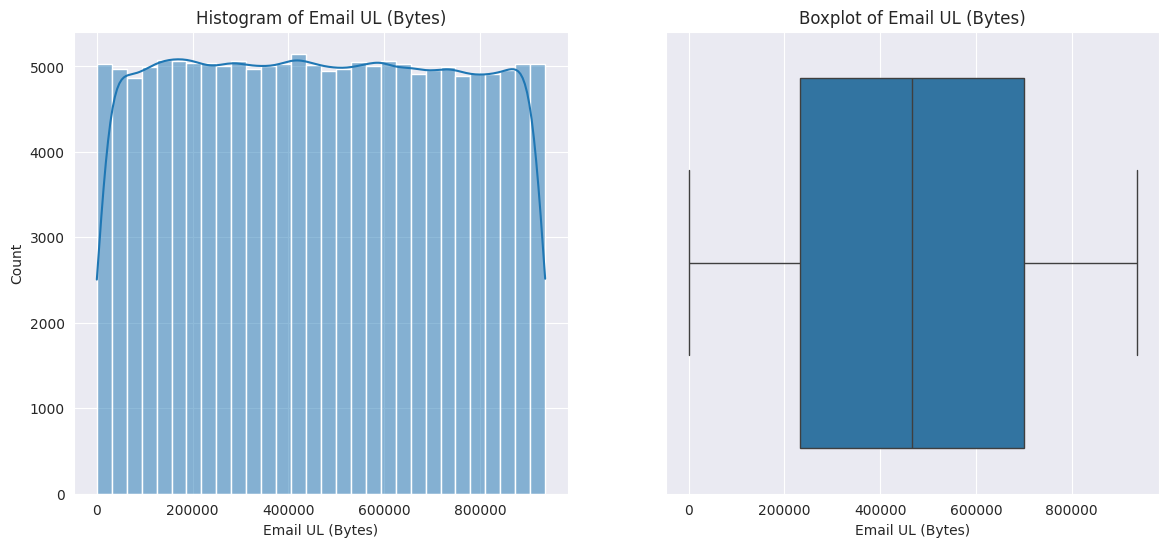

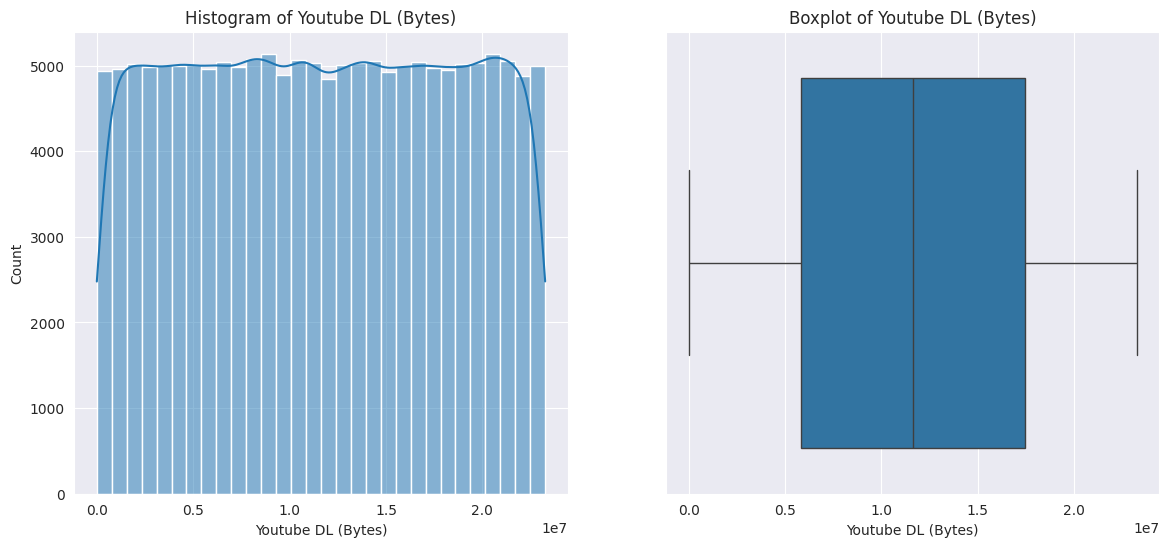

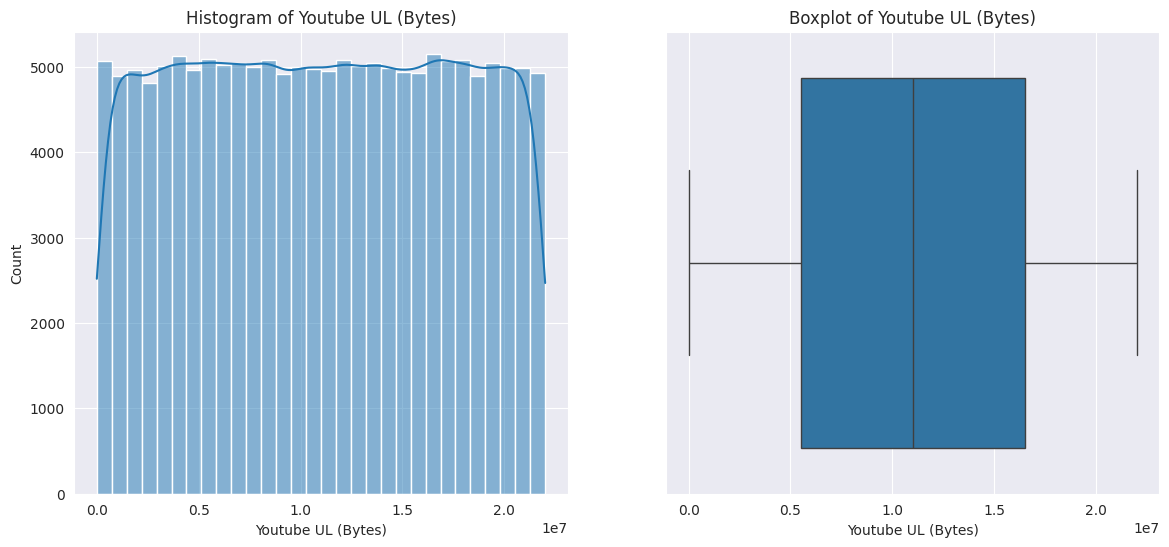

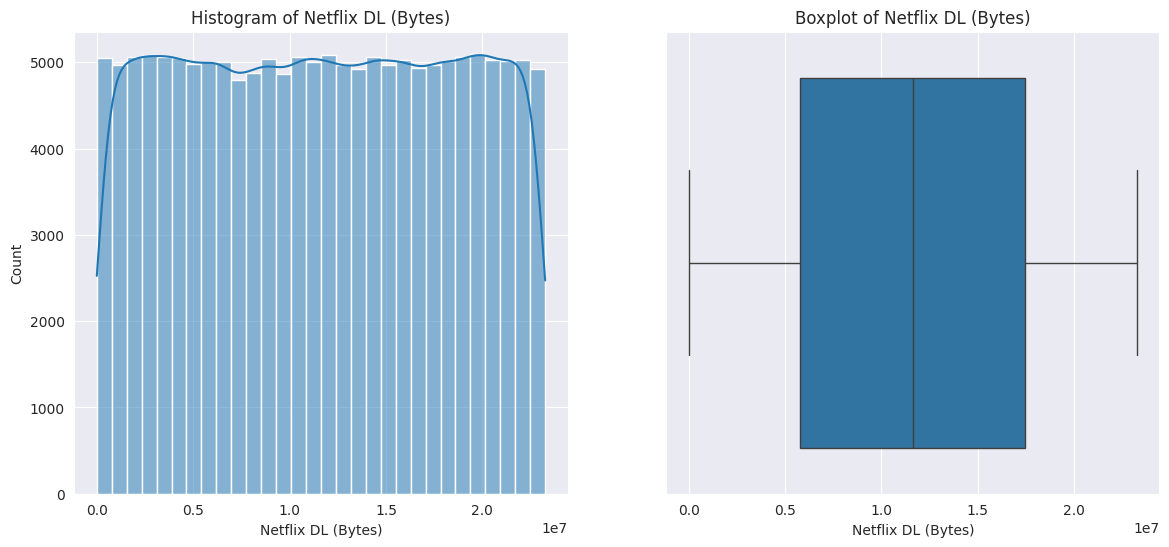

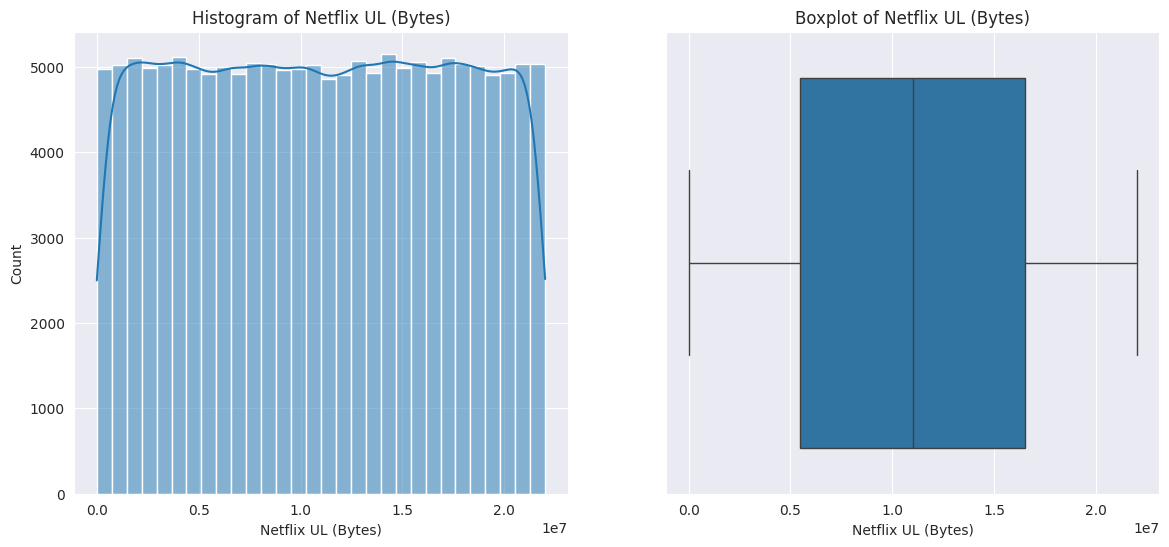

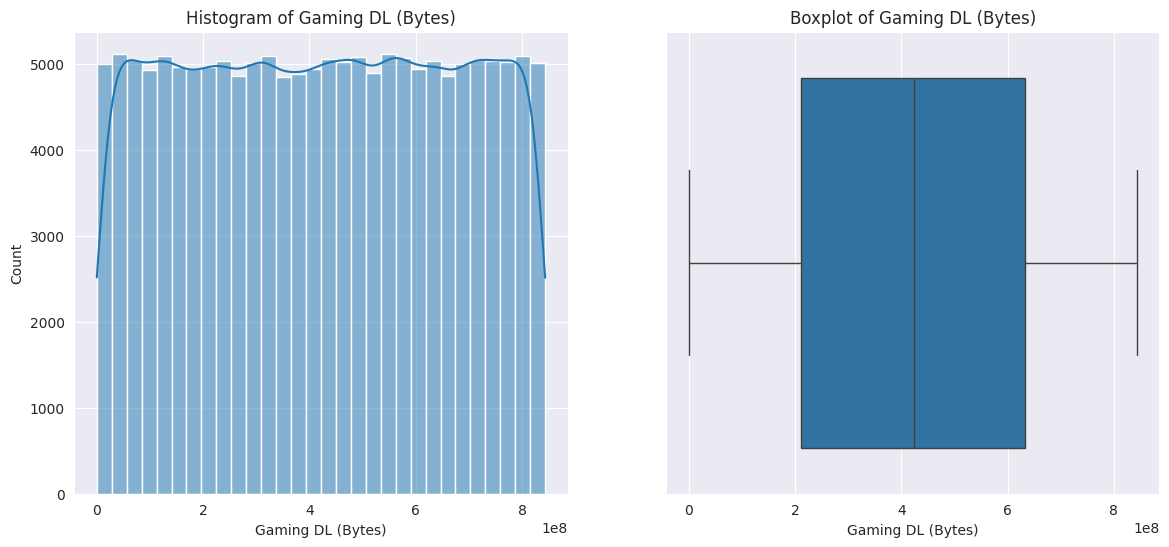

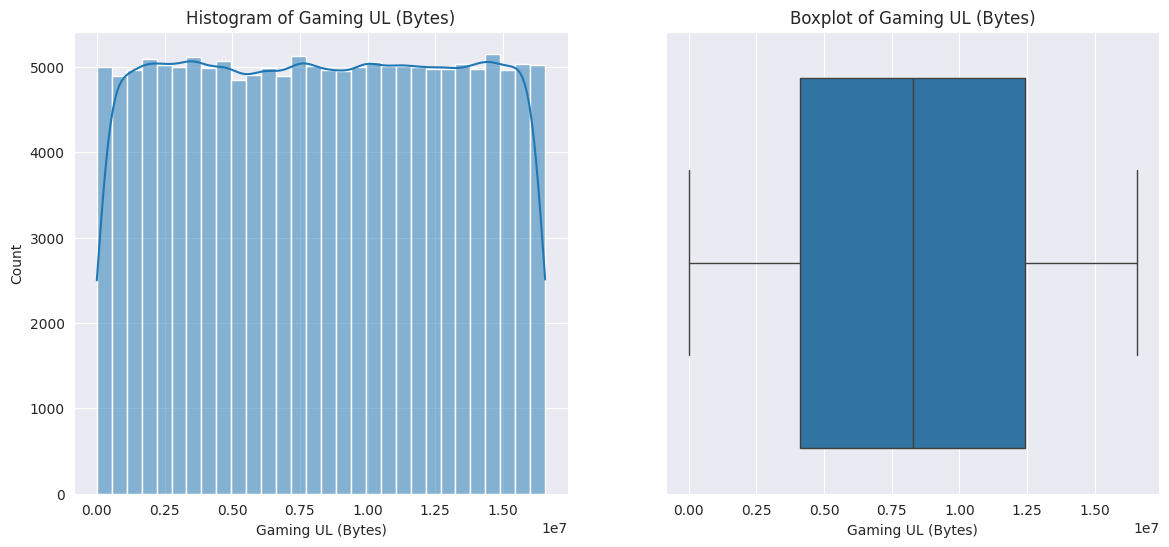

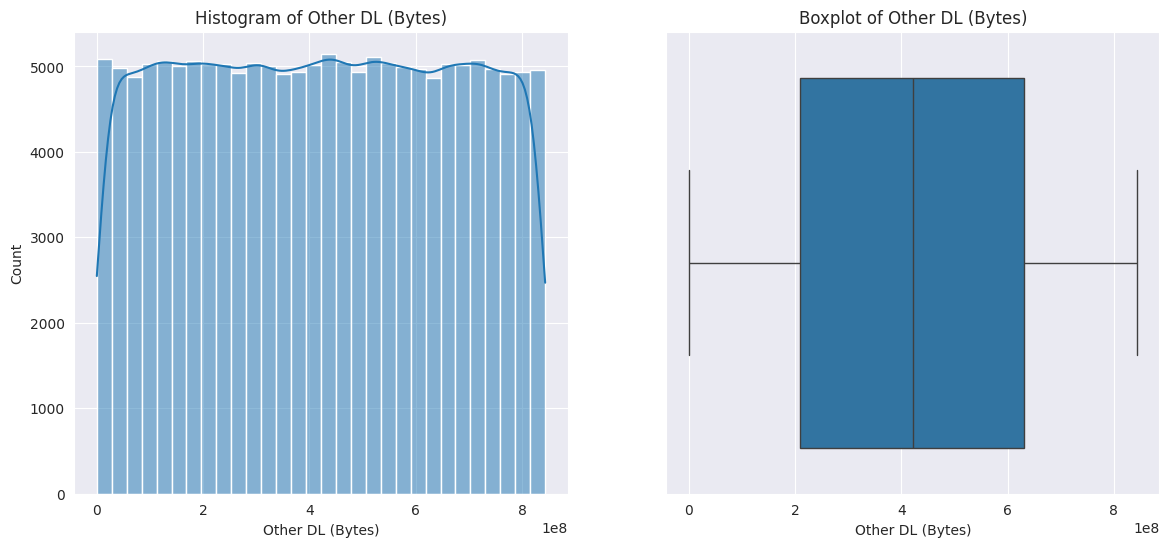

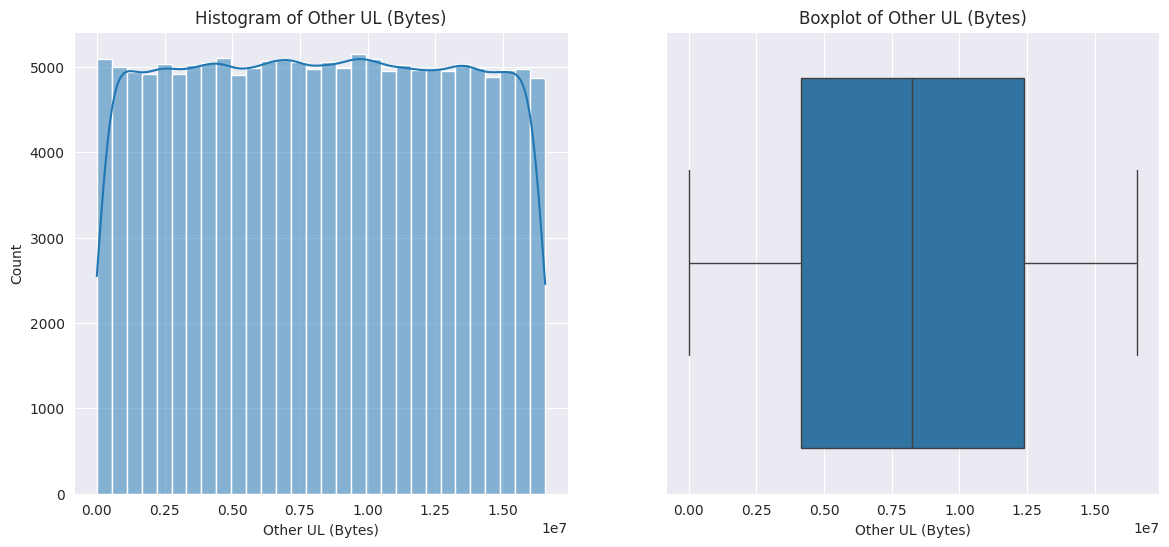

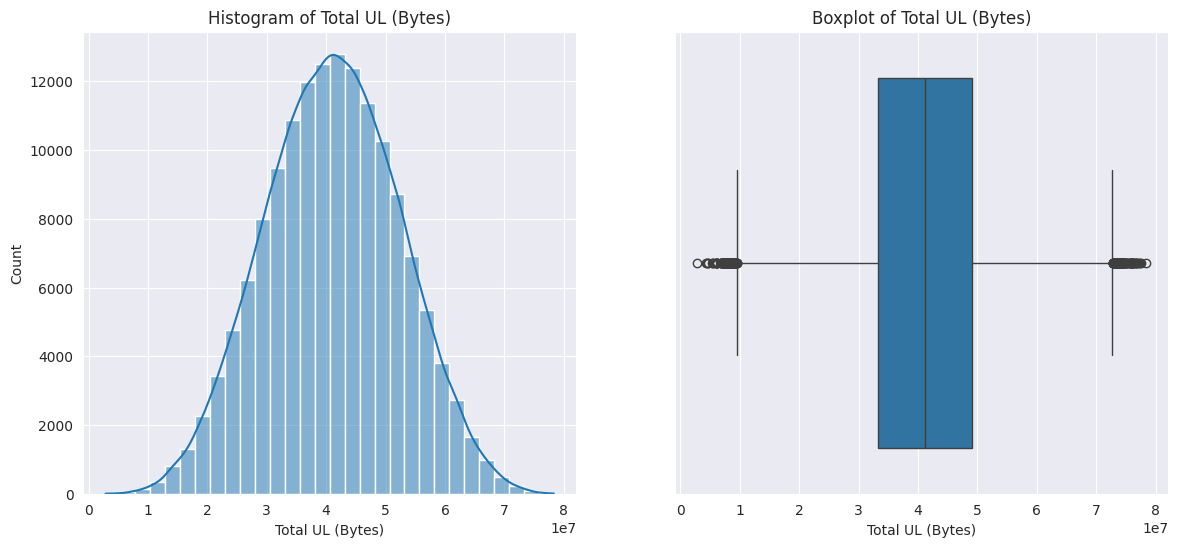

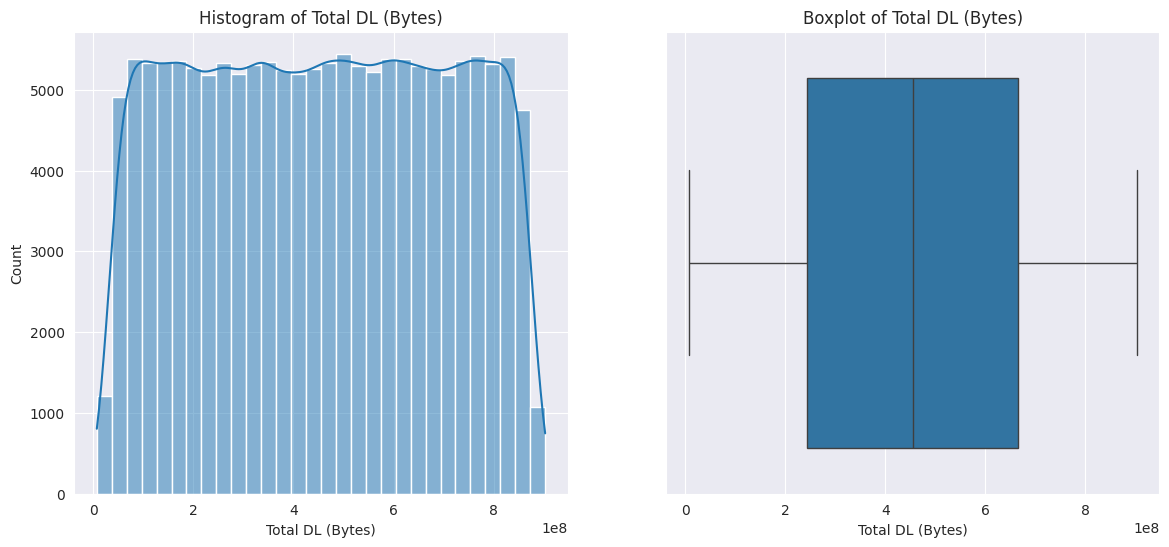

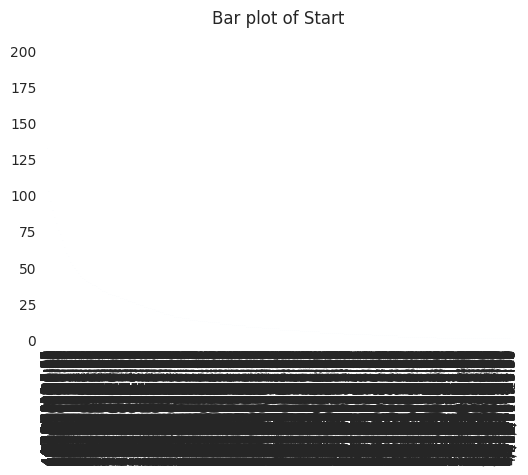

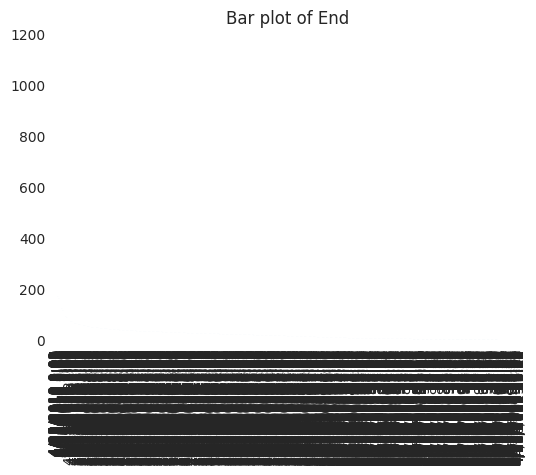

In [ ]:
# Assuming df is your DataFrame and you have numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# For each numerical column, plot a histogram and a boxplot
for col in numerical_columns:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

# For each categorical column, plot a bar plot
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {col}')
    plt.show()

## Group box plots for DL and UL data
Group box plots for DL and UL data for the different applications (e.g., Social Media, YouTube, Netflix, Google, Email, Gaming, and Other).

/tmp/ipykernel_124976/4031942906.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_df['Category'] = combined_df['Category'].str.replace(' DL \\(Bytes\\)', '').str.replace(' UL \\(Bytes\\)', '')


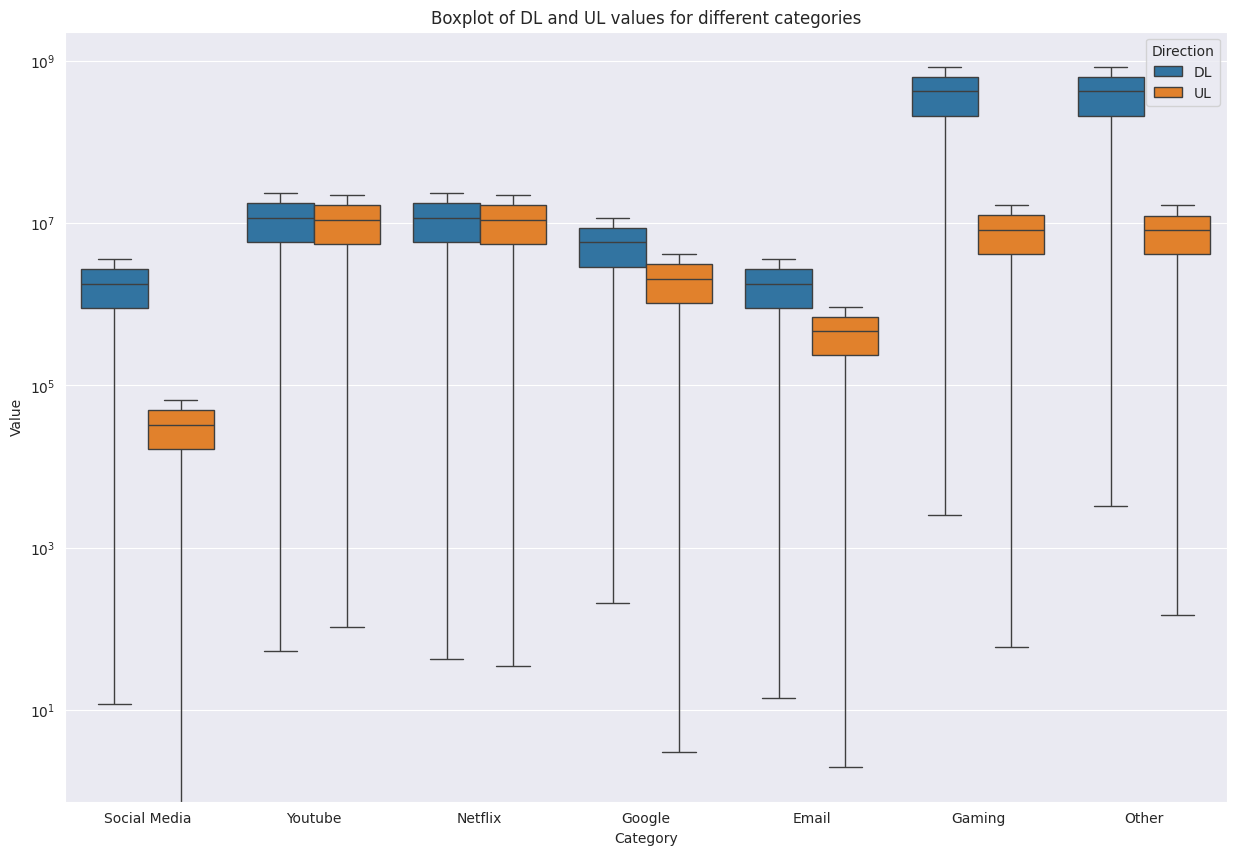

In [27]:
# Define the categories for which you want to create box plots
categories = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']

# Create a new DataFrame that melts the DL and UL columns into three columns: 'Category', 'Direction', and 'Value'
dl_columns = [f'{category} DL (Bytes)' for category in categories]
ul_columns = [f'{category} UL (Bytes)' for category in categories]
dl_df = pd.melt(df, value_vars=dl_columns, var_name='Category', value_name='Value')
dl_df['Direction'] = 'DL'
ul_df = pd.melt(df, value_vars=ul_columns, var_name='Category', value_name='Value')
ul_df['Direction'] = 'UL'
combined_df = pd.concat([dl_df, ul_df])

# Remove the ' DL (Bytes)' and ' UL (Bytes)' parts from the 'Category' column
combined_df['Category'] = combined_df['Category'].str.replace(' DL \\(Bytes\\)', '').str.replace(' UL \\(Bytes\\)', '')

# Create a boxplot with 'Category' and 'Direction' on the x-axis and 'Value' on the y-axis
plt.figure(figsize=(15, 10))
sns.boxplot(x='Category', y='Value', hue='Direction', data=combined_df)
plt.title('Boxplot of DL and UL values for different categories')
plt.yscale('log')  # Use a log scale for the y-axis because of the large range of values
plt.show()

# Bivariate Analysis
Relationship between the total data volume (in Bytes) and each application's total DL+UL data (in Bytes).

Correlation between Social Media Total (Bytes) and Total DL+UL (Bytes): 0.005382975316386654
Correlation between Youtube Total (Bytes) and Total DL+UL (Bytes): 0.034887696929145576
Correlation between Netflix Total (Bytes) and Total DL+UL (Bytes): 0.034798453200608544
Correlation between Google Total (Bytes) and Total DL+UL (Bytes): 0.013370327695874196
Correlation between Email Total (Bytes) and Total DL+UL (Bytes): 0.003767982484660759
Correlation between Gaming Total (Bytes) and Total DL+UL (Bytes): 0.9982543562029403
Correlation between Other Total (Bytes) and Total DL+UL (Bytes): -0.0024429034244218585


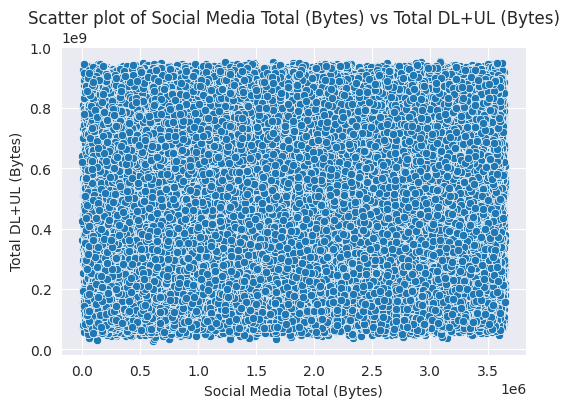

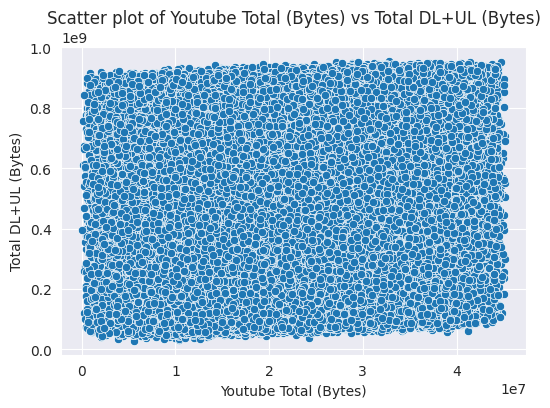

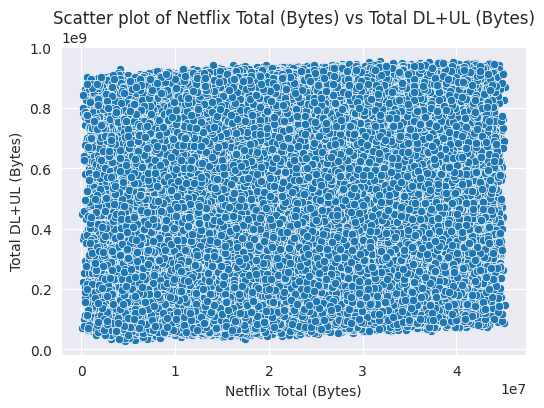

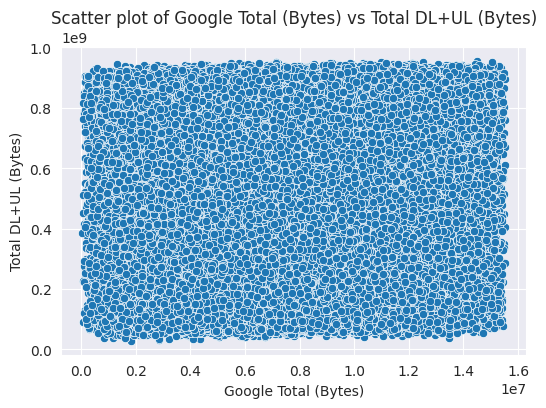

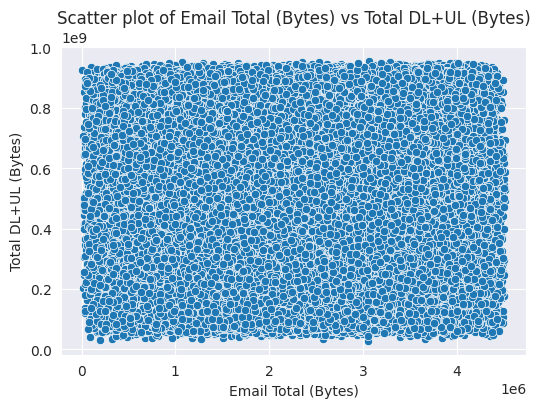

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the applications for which you want to analyze the relationship with the total DL+UL data
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']

# Calculate the total DL+UL data for each application
for app in applications:
    df[f'{app} Total (Bytes)'] = df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']

# Calculate the total DL+UL data
df['Total DL+UL (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Calculate and print the correlation between the total DL+UL data for each application and the total DL+UL data
for app in applications:
    correlation = df[f'{app} Total (Bytes)'].corr(df['Total DL+UL (Bytes)'])
    print(f'Correlation between {app} Total (Bytes) and Total DL+UL (Bytes): {correlation}')

# Create scatter plots to visually inspect the relationships
for app in applications:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=f'{app} Total (Bytes)', y='Total DL+UL (Bytes)', data=df)
    plt.title(f'Scatter plot of {app} Total (Bytes) vs Total DL+UL (Bytes)')
    plt.show()